# Task 2: Experimentation and uplift testing

In [148]:
# import libraries 
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

warnings.filterwarnings('ignore')

### Examining the data 

In [149]:
# QVI_data 
data = pd.read_csv('QVI_data.csv')

data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [150]:
# see statistical summary 
display(data.describe())

# see information 
display(data.info())

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


None

In [151]:
# see DATE column's values
data['DATE'].values.tolist()[0:5]

['2018-10-17', '2018-09-16', '2019-03-07', '2019-03-08', '2018-11-02']

### Breakdown of Stores

In [152]:
# get month from DATE 
def get_month_year(date):
    
    return date[:-3]

data['MONTH_YR'] = data['DATE'].apply(get_month_year)

def get_month(date):

    return date[5:-3]

data['MONTH'] = data['DATE'].apply(get_month)

data 

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_YR,MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10,10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09,09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03,03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03,03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,2018-12,12
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,2018-10,10
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,2018-10,10
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,2018-10,10


In [153]:
# breakdown stores by total sales revenue, total number of customers, average number of transactions per customer
unq_store_nbrs = data['STORE_NBR'].unique().tolist()

hold_dfs = []

for store_nbr in unq_store_nbrs:
    store = data.loc[data['STORE_NBR'] == store_nbr]

    store_mths = store['MONTH'].unique().tolist()
    
    for mth in store_mths:
        store_mth = store.loc[store['MONTH'] == mth]

        store_mth['SALES_REV'] = store_mth['TOT_SALES'].sum()
        store_mth['NUMBER_OF_CUST'] = len(store_mth['LYLTY_CARD_NBR'].unique().tolist())
        store_mth['AVERAGE_NUM_OF_TRANS_PER_CUST'] = store_mth.shape[0] / len(store_mth['LYLTY_CARD_NBR'].unique().tolist())
        store_mth['AVERAGE_SALES_REV_PER_CUST'] = store_mth['TOT_SALES'].sum() / len(store_mth['LYLTY_CARD_NBR'].unique().tolist())
        store_mth['AVERAGE_QTY_PER_CUST'] = store_mth['PROD_QTY'].sum() / len(store_mth['LYLTY_CARD_NBR'].unique().tolist())
        store_mth = store_mth[['STORE_NBR', 'MONTH', 'MONTH_YR', 'SALES_REV', 'NUMBER_OF_CUST', 'AVERAGE_NUM_OF_TRANS_PER_CUST', 'AVERAGE_QTY_PER_CUST', 'AVERAGE_SALES_REV_PER_CUST']]

        hold_dfs.append(store_mth)

brkdown_stores = pd.concat(hold_dfs)

brkdown_stores.drop_duplicates(inplace = True)

brkdown_stores.sort_values(by = ['STORE_NBR', 'MONTH'], ascending = True, inplace = True)

brkdown_stores.reset_index(drop = True, inplace = True)

brkdown_stores

,STORE_NBR,MONTH,MONTH_YR,SALES_REV,NUMBER_OF_CUST,AVERAGE_NUM_OF_TRANS_PER_CUST,AVERAGE_QTY_PER_CUST,AVERAGE_SALES_REV_PER_CUST
0,1,01,2019-01,154.80,35,1.028571,1.200000,4.422857
1,1,02,2019-02,225.40,52,1.057692,1.250000,4.334615
2,1,03,2019-03,192.90,45,1.088889,1.288889,4.286667
3,1,04,2019-04,192.90,42,1.023810,1.357143,4.592857
4,1,05,2019-05,221.40,46,1.108696,1.434783,4.813043
...,...,...,...,...,...,...,...,...
3164,272,08,2018-08,372.85,44,1.090909,1.931818,8.473864
3165,272,09,2018-09,304.70,32,1.125000,2.218750,9.521875
3166,272,10,2018-10,430.60,44,1.159091,2.250000,9.786364
3167,272,11,2018-11,376.20,41,1.097561,2.121951,9.175610


In [154]:
# ensure stores in brkdown_stores have all months covered 
unq_store_nbrs = brkdown_stores['STORE_NBR'].unique().tolist()

remove_stores = []

for store in unq_store_nbrs:
    see_df = brkdown_stores.loc[brkdown_stores['STORE_NBR'] == store]

    if see_df.shape[0] != 12:
        remove_stores.append(store)

print('Stores to be removed -> {}'.format(remove_stores))

brkdown_stores = brkdown_stores[~brkdown_stores['STORE_NBR'].isin(remove_stores)]

brkdown_stores1 = brkdown_stores 

# trial period up till Feb 2019
brkdown_stores = brkdown_stores.loc[brkdown_stores['MONTH_YR'] < '2019-03']

brkdown_stores.sort_values(by = ['STORE_NBR', 'MONTH_YR'], ascending = True, inplace = True)

brkdown_stores 

Stores to be removed -> [11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]


,STORE_NBR,MONTH,MONTH_YR,SALES_REV,NUMBER_OF_CUST,AVERAGE_NUM_OF_TRANS_PER_CUST,AVERAGE_QTY_PER_CUST,AVERAGE_SALES_REV_PER_CUST
6,1,07,2018-07,206.9,49,1.061224,1.265306,4.222449
7,1,08,2018-08,176.1,42,1.023810,1.285714,4.192857
8,1,09,2018-09,278.8,59,1.050847,1.271186,4.725424
9,1,10,2018-10,188.1,44,1.022727,1.318182,4.275000
10,1,11,2018-11,192.6,46,1.021739,1.239130,4.186957
...,...,...,...,...,...,...,...,...
3166,272,10,2018-10,430.6,44,1.159091,2.250000,9.786364
3167,272,11,2018-11,376.2,41,1.097561,2.121951,9.175610
3168,272,12,2018-12,403.9,47,1.000000,1.893617,8.593617
3157,272,01,2019-01,423.0,46,1.086957,2.086957,9.195652


In [155]:
# get trial stores 77, 86, 88
store_77 = brkdown_stores.loc[brkdown_stores['STORE_NBR'] == 77]
store_86 = brkdown_stores.loc[brkdown_stores['STORE_NBR'] == 86]
store_88 = brkdown_stores.loc[brkdown_stores['STORE_NBR'] == 88]

store_77 = store_77.reset_index(drop = True) 
store_86 = store_86.reset_index(drop = True) 
store_88 = store_88.reset_index(drop = True) 

# get control stores (not trial stores)
control_stores = brkdown_stores[~brkdown_stores['STORE_NBR'].isin([77, 86, 88])]

In [156]:
# correlation 
def get_correlation(trial_store, control_stores):

    control_store_nbrs = control_stores['STORE_NBR'].unique().tolist()

    trial_store_nbr = (trial_store['STORE_NBR'].values.tolist())[0]

    hold_dfs = []

    for num in control_store_nbrs:
        control_store_df = control_stores.loc[control_stores['STORE_NBR'] == num]
        control_store_df = control_store_df.reset_index(drop = True)

        SALES_REV_corr = control_store_df['SALES_REV'].corr(trial_store['SALES_REV'])
        NUMBER_OF_CUST_corr = control_store_df['NUMBER_OF_CUST'].corr(trial_store['NUMBER_OF_CUST'])
        AVERAGE_NUM_OF_TRANS_PER_CUST_corr = control_store_df['AVERAGE_NUM_OF_TRANS_PER_CUST'].corr(trial_store['AVERAGE_NUM_OF_TRANS_PER_CUST'])
        AVERAGE_QTY_PER_CUST_corr = control_store_df['AVERAGE_QTY_PER_CUST'].corr(trial_store['AVERAGE_QTY_PER_CUST'])
        AVERAGE_SALES_REV_PER_CUST_corr = control_store_df['AVERAGE_SALES_REV_PER_CUST'].corr(trial_store['AVERAGE_SALES_REV_PER_CUST'])

        dfs_to_be_concat = pd.DataFrame({'Trial_Store':[trial_store_nbr], 'Control_Store':[num], 'SALES_REV_corr':[SALES_REV_corr], 'NUMBER_OF_CUST_corr':[NUMBER_OF_CUST_corr], 'AVERAGE_NUM_OF_TRANS_PER_CUST_corr':[AVERAGE_NUM_OF_TRANS_PER_CUST_corr], 'AVERAGE_QTY_PER_CUST_corr':[AVERAGE_QTY_PER_CUST_corr], 'AVERAGE_SALES_REV_PER_CUST_corr':[AVERAGE_SALES_REV_PER_CUST_corr]})

        hold_dfs.append(dfs_to_be_concat)

    corr_df = pd.concat(hold_dfs)
    
    corr_df.reset_index(drop = True, inplace = True)

    return corr_df

In [157]:
# magnitude distance
def get_magnitude_distance(trial_store, control_stores):

    control_store_nbrs = control_stores['STORE_NBR'].unique().tolist()

    trial_store_nbr = (trial_store['STORE_NBR'].values.tolist())[0]

    hold_dfs = []

    for num in control_store_nbrs:
        control_store_df = control_stores.loc[control_stores['STORE_NBR'] == num]
        control_store_df = control_store_df.reset_index(drop = True)

        SALES_REV_md = control_store_df['SALES_REV'] - trial_store['SALES_REV']
        SALES_REV_md = 1 - ((SALES_REV_md - min(SALES_REV_md)) / (max(SALES_REV_md) - min(SALES_REV_md)))
        SALES_REV_md = np.mean(SALES_REV_md)

        NUMBER_OF_CUST_md = control_store_df['NUMBER_OF_CUST'] - trial_store['NUMBER_OF_CUST']
        NUMBER_OF_CUST_md = 1 - ((NUMBER_OF_CUST_md - min(NUMBER_OF_CUST_md)) / (max(NUMBER_OF_CUST_md) - min(NUMBER_OF_CUST_md)))
        NUMBER_OF_CUST_md = np.mean(NUMBER_OF_CUST_md)
        
        AVERAGE_NUM_OF_TRANS_PER_CUST_md = control_store_df['AVERAGE_NUM_OF_TRANS_PER_CUST'] - trial_store['AVERAGE_NUM_OF_TRANS_PER_CUST']
        AVERAGE_NUM_OF_TRANS_PER_CUST_md = 1 - ((AVERAGE_NUM_OF_TRANS_PER_CUST_md - min(AVERAGE_NUM_OF_TRANS_PER_CUST_md)) / (max(AVERAGE_NUM_OF_TRANS_PER_CUST_md) - min(AVERAGE_NUM_OF_TRANS_PER_CUST_md)))
        AVERAGE_NUM_OF_TRANS_PER_CUST_md = np.mean(AVERAGE_NUM_OF_TRANS_PER_CUST_md)
        
        AVERAGE_QTY_PER_CUST_md = control_store_df['AVERAGE_QTY_PER_CUST'] - trial_store['AVERAGE_QTY_PER_CUST']
        AVERAGE_QTY_PER_CUST_md = 1 - ((AVERAGE_QTY_PER_CUST_md - min(AVERAGE_QTY_PER_CUST_md)) / (max(AVERAGE_QTY_PER_CUST_md) - min(AVERAGE_QTY_PER_CUST_md)))
        AVERAGE_QTY_PER_CUST_md = np.mean(AVERAGE_QTY_PER_CUST_md)
        
        AVERAGE_SALES_REV_PER_CUST_md = control_store_df['AVERAGE_SALES_REV_PER_CUST'] - trial_store['AVERAGE_SALES_REV_PER_CUST']
        AVERAGE_SALES_REV_PER_CUST_md = 1 - ((AVERAGE_SALES_REV_PER_CUST_md - min(AVERAGE_SALES_REV_PER_CUST_md)) / (max(AVERAGE_SALES_REV_PER_CUST_md) - min(AVERAGE_SALES_REV_PER_CUST_md)))
        AVERAGE_SALES_REV_PER_CUST_md = np.mean(AVERAGE_SALES_REV_PER_CUST_md)

        dfs_to_be_concat = pd.DataFrame({'Trial_Store':[trial_store_nbr], 'Control_Store':[num], 'SALES_REV_md':[SALES_REV_md], 'NUMBER_OF_CUST_md':[NUMBER_OF_CUST_md], 'AVERAGE_NUM_OF_TRANS_PER_CUST_md':[AVERAGE_NUM_OF_TRANS_PER_CUST_md], 'AVERAGE_QTY_PER_CUST_md':[AVERAGE_QTY_PER_CUST_md], 'AVERAGE_SALES_REV_PER_CUST_md':[AVERAGE_SALES_REV_PER_CUST_md]})

        hold_dfs.append(dfs_to_be_concat)

    md_df = pd.concat(hold_dfs)
    
    md_df.reset_index(drop = True, inplace = True)

    return md_df

In [158]:
# for later use
brkdown_stores1.sort_values(by = ['STORE_NBR', 'MONTH_YR'], ascending = True, inplace = True)

brkdown_stores1

,STORE_NBR,MONTH,MONTH_YR,SALES_REV,NUMBER_OF_CUST,AVERAGE_NUM_OF_TRANS_PER_CUST,AVERAGE_QTY_PER_CUST,AVERAGE_SALES_REV_PER_CUST
6,1,07,2018-07,206.9,49,1.061224,1.265306,4.222449
7,1,08,2018-08,176.1,42,1.023810,1.285714,4.192857
8,1,09,2018-09,278.8,59,1.050847,1.271186,4.725424
9,1,10,2018-10,188.1,44,1.022727,1.318182,4.275000
10,1,11,2018-11,192.6,46,1.021739,1.239130,4.186957
...,...,...,...,...,...,...,...,...
3158,272,02,2019-02,395.5,45,1.066667,2.022222,8.788889
3159,272,03,2019-03,442.3,50,1.060000,2.020000,8.846000
3160,272,04,2019-04,445.1,54,1.037037,1.944444,8.242593
3161,272,05,2019-05,314.6,34,1.176471,2.088235,9.252941


### Store 77

In [159]:
# correlation with control stores 
store_77_corr = get_correlation(trial_store = store_77, control_stores = control_stores)
store_77_md = get_magnitude_distance(trial_store = store_77, control_stores = control_stores)

# merge 
store_77_corr_md = store_77_corr.merge(store_77_md, on = ['Trial_Store', 'Control_Store'], how = 'left')

# combined score
store_77_corr_md['SALES_REV_cs'] = 0.5 * store_77_corr_md['SALES_REV_corr'] + 0.5 * store_77_corr_md['SALES_REV_md']
store_77_corr_md['NUMBER_OF_CUST_cs'] = 0.5 * store_77_corr_md['NUMBER_OF_CUST_corr'] + 0.5 * store_77_corr_md['NUMBER_OF_CUST_md']
store_77_corr_md['AVERAGE_NUM_OF_TRANS_PER_CUST_cs'] = 0.5 * store_77_corr_md['AVERAGE_NUM_OF_TRANS_PER_CUST_corr'] + 0.5 * store_77_corr_md['AVERAGE_NUM_OF_TRANS_PER_CUST_md']
store_77_corr_md['AVERAGE_QTY_PER_CUST_cs'] = 0.5 * store_77_corr_md['AVERAGE_QTY_PER_CUST_corr'] + 0.5 * store_77_corr_md['AVERAGE_QTY_PER_CUST_md']
store_77_corr_md['AVERAGE_SALES_REV_PER_CUST_cs'] = 0.5 * store_77_corr_md['AVERAGE_SALES_REV_PER_CUST_corr'] + 0.5 * store_77_corr_md['AVERAGE_SALES_REV_PER_CUST_md']

store_77_comb_sre = store_77_corr_md[['Trial_Store', 'Control_Store', 'SALES_REV_cs', 'NUMBER_OF_CUST_cs', 'AVERAGE_NUM_OF_TRANS_PER_CUST_cs', 'AVERAGE_QTY_PER_CUST_cs', 'AVERAGE_SALES_REV_PER_CUST_cs']]

# for SALES_REV and NUMBER_OF_CUST
store_77_comb_sre['Score'] = 0.5 * store_77_comb_sre['SALES_REV_cs'] + 0.5 * store_77_comb_sre['NUMBER_OF_CUST_cs'] 

store_77_sre = store_77_comb_sre[['Trial_Store', 'Control_Store', 'Score']]

store_77_sre.sort_values(by = ['Score'], ascending = False, inplace = True)

display(store_77_sre) 

print('The Control Store is: {}'.format(int(store_77_sre.iloc[0]['Control_Store'])))

display((store_77_sre.loc[store_77_sre['Control_Store'] == store_77_sre.iloc[0]['Control_Store']]).reset_index(drop = True))

,Trial_Store,Control_Store,Score
218,77,233,0.698267
108,77,119,0.678409
67,77,71,0.650569
105,77,115,0.640018
2,77,3,0.633560
...,...,...,...
242,77,258,-0.045426
251,77,267,-0.053722
227,77,242,-0.059892
92,77,102,-0.060108


The Control Store is: 233


,Trial_Store,Control_Store,Score
0,77,233,0.698267


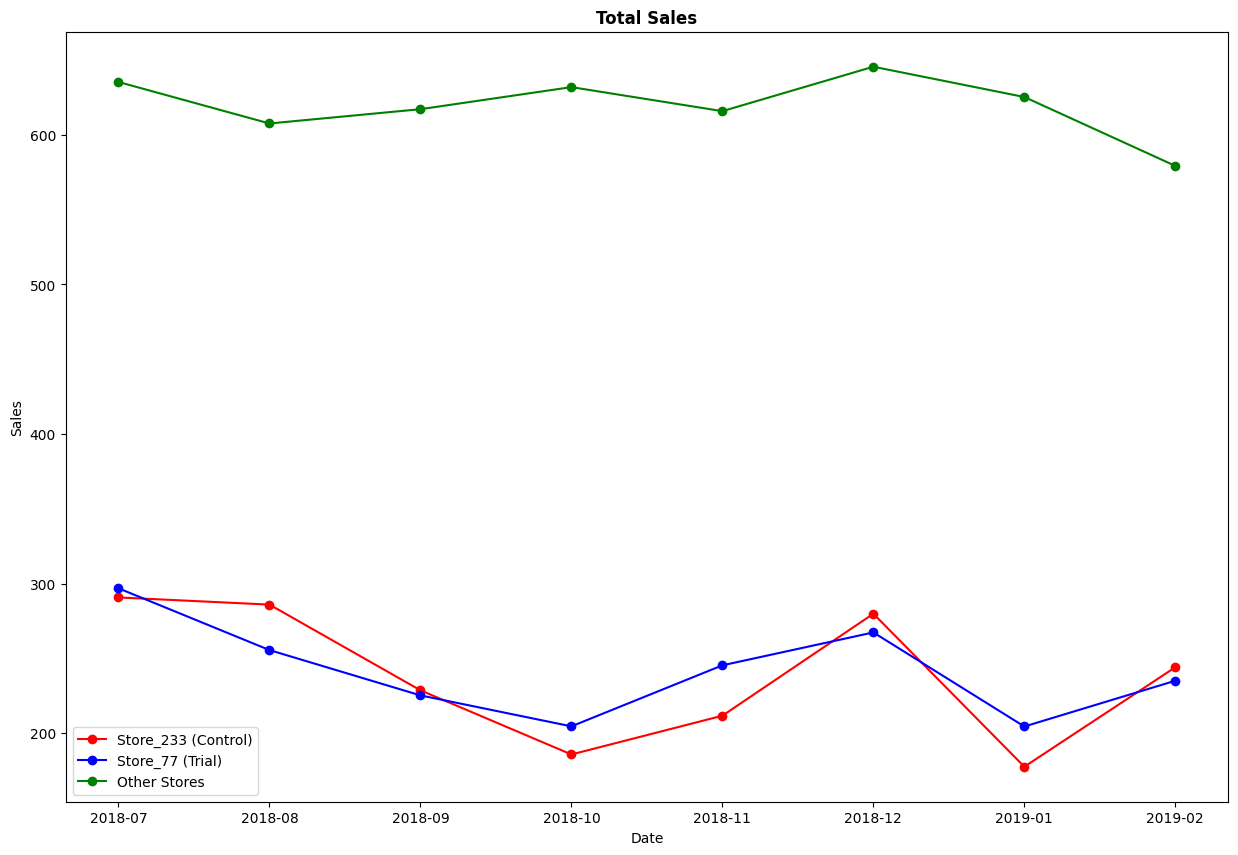

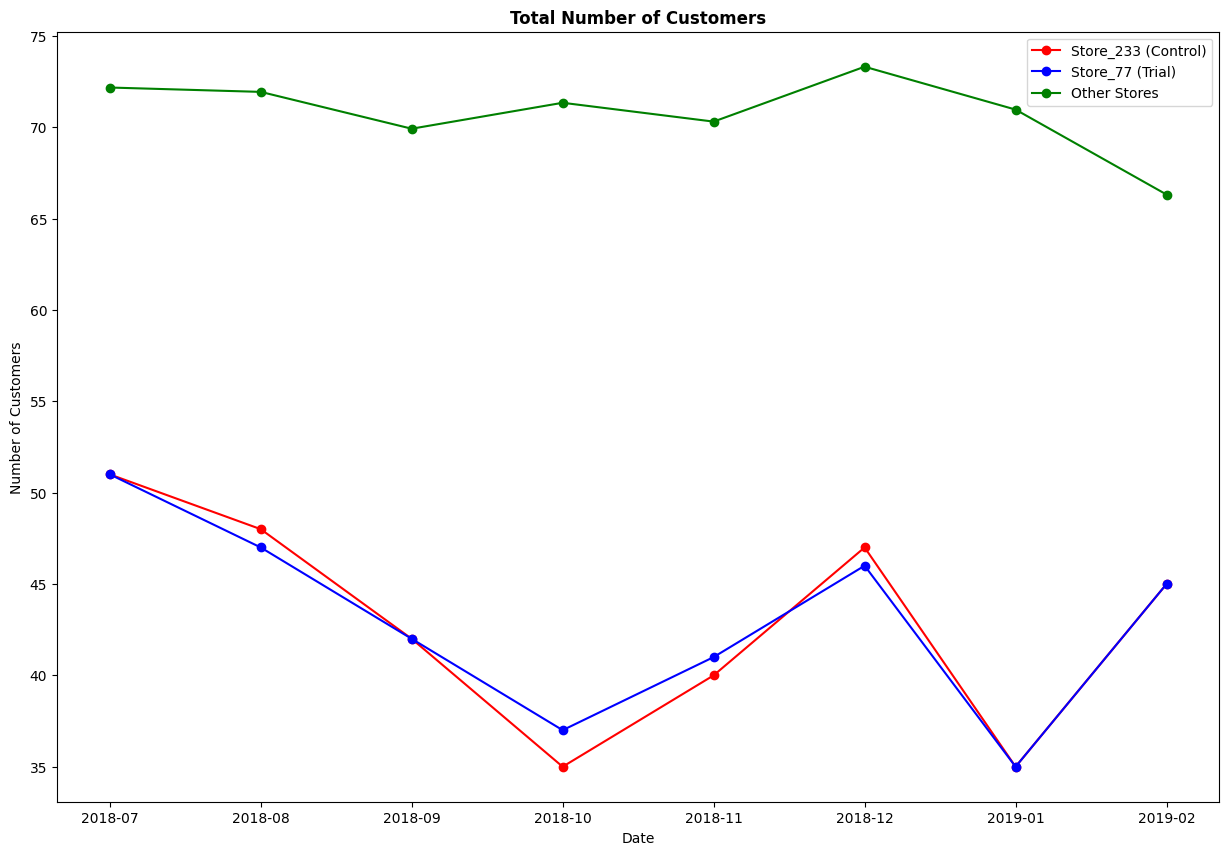

In [160]:
# plotting store 233 (control), store 77 (trial) and the other stores for SALES_REV & NUMBER_OF_CUST
oth_stores = brkdown_stores[~brkdown_stores['STORE_NBR'].isin([int(store_77_sre.iloc[0]['Control_Store']), 77, 86, 88])]

unq_dates = oth_stores['MONTH_YR'].unique().tolist()

hold_sales_rev = []

for date in unq_dates:
    df_dt = brkdown_stores.loc[brkdown_stores['MONTH_YR'] == date]

    hold_sales_rev.append(df_dt['SALES_REV'].mean())

hold_cust_cnt = []

for date in unq_dates:
    df_dt = brkdown_stores.loc[brkdown_stores['MONTH_YR'] == date]

    hold_cust_cnt.append(df_dt['NUMBER_OF_CUST'].mean())

plt.figure(figsize = (15, 10))
plt.title('Total Sales', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(brkdown_stores.loc[brkdown_stores['STORE_NBR'] == int(store_77_sre.iloc[0]['Control_Store'])]['MONTH_YR'], brkdown_stores.loc[brkdown_stores['STORE_NBR'] == int(store_77_sre.iloc[0]['Control_Store'])]['SALES_REV'], marker = 'o', color = 'red')
plt.plot(store_77['MONTH_YR'], store_77['SALES_REV'], marker = 'o', color = 'blue')
plt.plot(unq_dates, hold_sales_rev, marker = 'o', color = 'green')
plt.legend(['Store_233 (Control)', 'Store_77 (Trial)', 'Other Stores'])
plt.savefig('visualisations1/Total_Sales_77.png')
plt.show()

plt.figure(figsize = (15, 10))
plt.title('Total Number of Customers', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.plot(brkdown_stores.loc[brkdown_stores['STORE_NBR'] == int(store_77_sre.iloc[0]['Control_Store'])]['MONTH_YR'], brkdown_stores.loc[brkdown_stores['STORE_NBR'] == int(store_77_sre.iloc[0]['Control_Store'])]['NUMBER_OF_CUST'], marker = 'o', color = 'red')
plt.plot(store_77['MONTH_YR'], store_77['NUMBER_OF_CUST'], marker = 'o', color = 'blue')
plt.plot(unq_dates, hold_cust_cnt, marker = 'o', color = 'green')
plt.legend(['Store_233 (Control)', 'Store_77 (Trial)', 'Other Stores'])
plt.savefig('visualisations1/Total_Customers_77.png')
plt.show()

In [161]:
# assessment of trial for SALES_REV
brkdown_stores_for_77 = brkdown_stores1

# trial period from Feb 2019 - Apr 2019
brkdown_stores_for_77_b4 = brkdown_stores_for_77.loc[brkdown_stores_for_77['MONTH_YR'] < '2019-02']

scale_num = (brkdown_stores_for_77_b4.loc[brkdown_stores_for_77_b4['STORE_NBR'] == 77])['SALES_REV'].sum() / (brkdown_stores_for_77_b4.loc[brkdown_stores_for_77_b4['STORE_NBR'] == 233])['SALES_REV'].sum()

brkdown_stores_for_77['SCALED_SALES_REV'] = brkdown_stores_for_77['SALES_REV'] * scale_num

display((brkdown_stores_for_77.loc[brkdown_stores_for_77['STORE_NBR'] == 233]).reset_index(drop = True))

,STORE_NBR,MONTH,MONTH_YR,SALES_REV,NUMBER_OF_CUST,AVERAGE_NUM_OF_TRANS_PER_CUST,AVERAGE_QTY_PER_CUST,AVERAGE_SALES_REV_PER_CUST,SCALED_SALES_REV
0,233,07,2018-07,290.7,51,1.058824,1.725490,5.700000,297.565550
1,233,08,2018-08,285.9,48,1.041667,1.666667,5.956250,292.652187
2,233,09,2018-09,228.6,42,1.071429,1.666667,5.442857,233.998916
3,233,10,2018-10,185.7,35,1.028571,1.600000,5.305714,190.085733
4,233,11,2018-11,211.6,40,1.025000,1.550000,5.290000,216.597421
5,233,12,2018-12,279.8,47,1.063830,1.595745,5.953191,286.408121
6,233,01,2019-01,177.5,35,1.000000,1.342857,5.071429,181.692071
7,233,02,2019-02,244.0,45,1.044444,1.555556,5.422222,249.762622
8,233,03,2019-03,199.1,40,1.025000,1.475000,4.977500,203.802205
9,233,04,2019-04,158.6,30,1.100000,1.533333,5.286667,162.345704


In [162]:
# percentage difference between trial's SALES_REV and control store's SCALED_SALES_REV
percent_diff_df = (brkdown_stores_for_77.loc[brkdown_stores_for_77['STORE_NBR'] == 77])[['MONTH_YR', 'SALES_REV']].merge((brkdown_stores_for_77.loc[brkdown_stores_for_77['STORE_NBR'] == 233])[['MONTH_YR', 'SCALED_SALES_REV']], on = 'MONTH_YR', how = 'left')

def get_percent_diff(trial_sales, control_sales):

    diff = (trial_sales - control_sales) / control_sales

    return diff

percent_diff_df['PERCENT_DIFF'] = percent_diff_df.apply(lambda i: get_percent_diff(i['SALES_REV'], i['SCALED_SALES_REV']), axis = 1)

percent_diff_df

,MONTH_YR,SALES_REV,SCALED_SALES_REV,PERCENT_DIFF
0,2018-07,296.8,297.565550,-0.002573
1,2018-08,255.5,292.652187,-0.126950
2,2018-09,225.2,233.998916,-0.037602
3,2018-10,204.5,190.085733,0.075830
4,2018-11,245.3,216.597421,0.132516
5,2018-12,267.3,286.408121,-0.066716
6,2019-01,204.4,181.692071,0.124980
7,2019-02,235.0,249.762622,-0.059107
8,2019-03,278.5,203.802205,0.366521
9,2019-04,263.5,162.345704,0.623080


In [163]:
# t-test, H0: trial = control vs H1: trial != control 

# the test statistic: PERCENT_DIFF / standard deviation of PERCENT_DIFF
# degrees of freedom is 8 (months) - 1 = 7
# 95th percentile 
percent_diff_df['TEST_STAT'] = abs(percent_diff_df['PERCENT_DIFF'] / ((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()))

percent_diff_df['CRITICAL_VAL'] = scipy.stats.t.ppf(q = 0.95, df = 7)

display(percent_diff_df)

print('TEST_STAT for these MONTH_YRs is significantly larger than the 95th percentile value of the t-distribution')

display((percent_diff_df[percent_diff_df['MONTH_YR'].isin(['2019-03', '2019-04'])])[['MONTH_YR', 'TEST_STAT', 'CRITICAL_VAL']].reset_index(drop = True))

,MONTH_YR,SALES_REV,SCALED_SALES_REV,PERCENT_DIFF,TEST_STAT,CRITICAL_VAL
0,2018-07,296.8,297.565550,-0.002573,0.025834,1.894579
1,2018-08,255.5,292.652187,-0.126950,1.274771,1.894579
2,2018-09,225.2,233.998916,-0.037602,0.377585,1.894579
3,2018-10,204.5,190.085733,0.075830,0.761452,1.894579
4,2018-11,245.3,216.597421,0.132516,1.330661,1.894579
5,2018-12,267.3,286.408121,-0.066716,0.669934,1.894579
6,2019-01,204.4,181.692071,0.124980,1.254993,1.894579
7,2019-02,235.0,249.762622,-0.059107,0.593520,1.894579
8,2019-03,278.5,203.802205,0.366521,3.680430,1.894579
9,2019-04,263.5,162.345704,0.623080,6.256669,1.894579


TEST_STAT for these MONTH_YRs is significantly larger than the 95th percentile value of the t-distribution


,MONTH_YR,TEST_STAT,CRITICAL_VAL
0,2019-03,3.680430,1.894579
1,2019-04,6.256669,1.894579


In [164]:
# constructing the dfs for the plots 
SALES_REV_df = percent_diff_df[['MONTH_YR', 'SALES_REV']]
SALES_REV_df['TYPE'] = 'Trial Store 77'
SALES_REV_df = SALES_REV_df[['TYPE', 'MONTH_YR', 'SALES_REV']]
SALES_REV_df = pd.concat([SALES_REV_df, (brkdown_stores_for_77.loc[brkdown_stores_for_77['STORE_NBR'] == 233])[['MONTH_YR', 'SALES_REV']]])
SALES_REV_df.fillna('Control Store 233', inplace = True)
SALES_REV_df.reset_index(drop = True, inplace = True)

display(SALES_REV_df)

SALES_REV_95_df = (brkdown_stores_for_77.loc[brkdown_stores_for_77['STORE_NBR'] == 233])[['MONTH_YR', 'SALES_REV']]
SALES_REV_95_df['TYPE'] = 'Control Store 233 95th percentile'
SALES_REV_95_df['SALES_REV'] = SALES_REV_95_df['SALES_REV'] * (1 + (((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()) * 2))
SALES_REV_95_df = SALES_REV_95_df[['TYPE', 'MONTH_YR', 'SALES_REV']]

display(SALES_REV_95_df)

SALES_REV_5_df = (brkdown_stores_for_77.loc[brkdown_stores_for_77['STORE_NBR'] == 233])[['MONTH_YR', 'SALES_REV']]
SALES_REV_5_df['TYPE'] = 'Control Store 233 5th percentile'
SALES_REV_5_df['SALES_REV'] = SALES_REV_5_df['SALES_REV'] * (1 - (((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()) * 2))
SALES_REV_5_df = SALES_REV_5_df[['TYPE', 'MONTH_YR', 'SALES_REV']]

display(SALES_REV_5_df)

,TYPE,MONTH_YR,SALES_REV
0,Trial Store 77,2018-07,296.8
1,Trial Store 77,2018-08,255.5
2,Trial Store 77,2018-09,225.2
3,Trial Store 77,2018-10,204.5
4,Trial Store 77,2018-11,245.3
5,Trial Store 77,2018-12,267.3
6,Trial Store 77,2019-01,204.4
7,Trial Store 77,2019-02,235.0
8,Trial Store 77,2019-03,278.5
9,Trial Store 77,2019-04,263.5


,TYPE,MONTH_YR,SALES_REV
2705,Control Store 233 95th percentile,2018-07,348.599573
2706,Control Store 233 95th percentile,2018-08,342.843543
2707,Control Store 233 95th percentile,2018-09,274.130934
2708,Control Store 233 95th percentile,2018-10,222.686415
2709,Control Store 233 95th percentile,2018-11,253.744994
2710,Control Store 233 95th percentile,2018-12,335.528588
2699,Control Store 233 95th percentile,2019-01,212.853196
2700,Control Store 233 95th percentile,2019-02,292.598197
2701,Control Store 233 95th percentile,2019-03,238.755332
2702,Control Store 233 95th percentile,2019-04,190.188828


,TYPE,MONTH_YR,SALES_REV
2705,Control Store 233 5th percentile,2018-07,232.800427
2706,Control Store 233 5th percentile,2018-08,228.956457
2707,Control Store 233 5th percentile,2018-09,183.069066
2708,Control Store 233 5th percentile,2018-10,148.713585
2709,Control Store 233 5th percentile,2018-11,169.455006
2710,Control Store 233 5th percentile,2018-12,224.071412
2699,Control Store 233 5th percentile,2019-01,142.146804
2700,Control Store 233 5th percentile,2019-02,195.401803
2701,Control Store 233 5th percentile,2019-03,159.444668
2702,Control Store 233 5th percentile,2019-04,127.011172


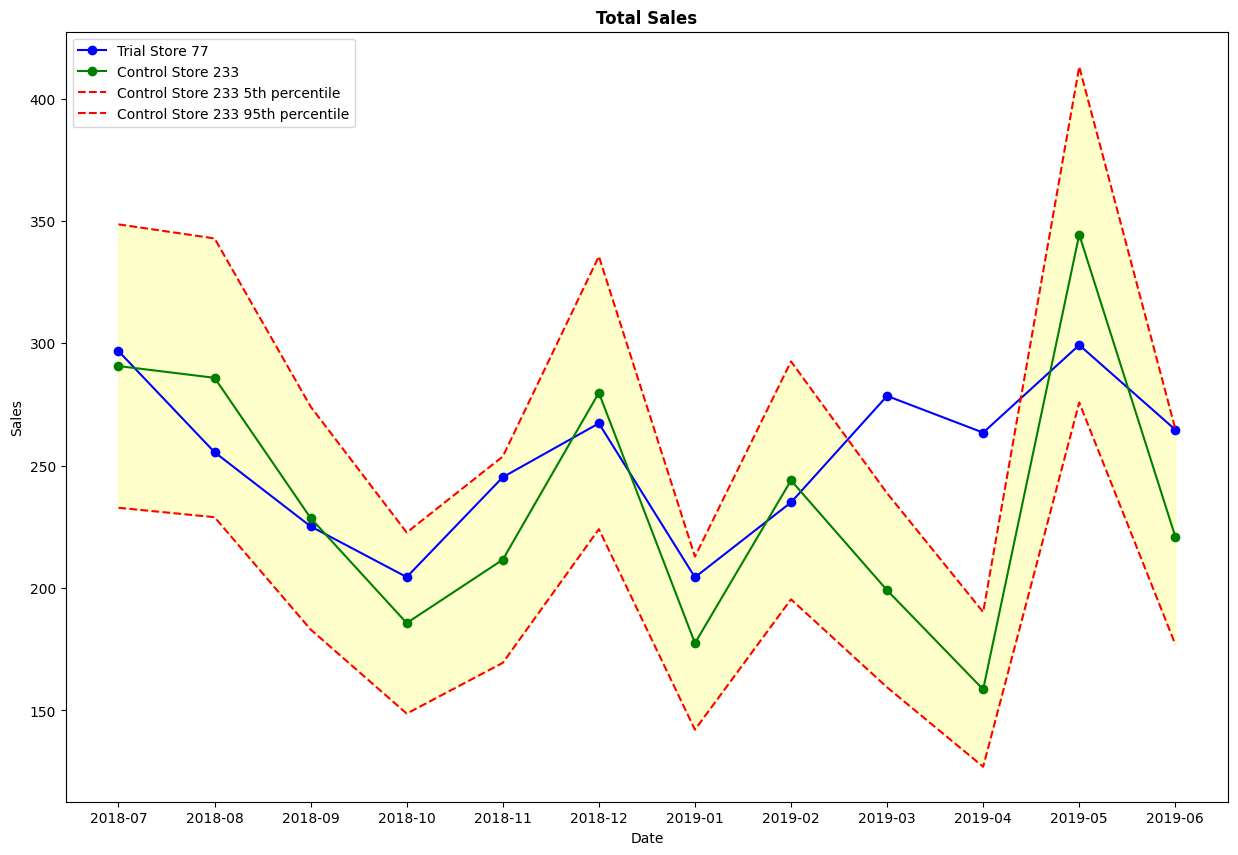

In [165]:
# plotting the graph
plt.figure(figsize = (15, 10))
plt.title('Total Sales', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot((SALES_REV_df.loc[SALES_REV_df['TYPE'] == 'Trial Store 77'])['MONTH_YR'], (SALES_REV_df.loc[SALES_REV_df['TYPE'] == 'Trial Store 77'])['SALES_REV'], marker = 'o', color = 'blue')
plt.plot((SALES_REV_df.loc[SALES_REV_df['TYPE'] == 'Control Store 233'])['MONTH_YR'], (SALES_REV_df.loc[SALES_REV_df['TYPE'] == 'Control Store 233'])['SALES_REV'], marker = 'o', color = 'green')
plt.plot(SALES_REV_5_df['MONTH_YR'], SALES_REV_5_df['SALES_REV'], linestyle = '--', color = 'red')
plt.plot(SALES_REV_95_df['MONTH_YR'], SALES_REV_95_df['SALES_REV'], linestyle = '--', color = 'red')
plt.legend(['Trial Store 77', 'Control Store 233', 'Control Store 233 5th percentile', 'Control Store 233 95th percentile'])
plt.fill_between(SALES_REV_95_df['MONTH_YR'], SALES_REV_95_df['SALES_REV'], SALES_REV_5_df['SALES_REV'], color = 'yellow', alpha = 0.2)
plt.savefig('visualisations1/Total_Sales_Conf_77.png')
plt.show()

In [166]:
# assessment of trial for NUMBER_OF_CUST
brkdown_stores_for_77 = brkdown_stores1

# trial period from Feb 2019 - Apr 2019
brkdown_stores_for_77_b4 = brkdown_stores_for_77.loc[brkdown_stores_for_77['MONTH_YR'] < '2019-02']

scale_num = (brkdown_stores_for_77_b4.loc[brkdown_stores_for_77_b4['STORE_NBR'] == 77])['NUMBER_OF_CUST'].sum() / (brkdown_stores_for_77_b4.loc[brkdown_stores_for_77_b4['STORE_NBR'] == 233])['NUMBER_OF_CUST'].sum()

brkdown_stores_for_77['SCALED_NUMBER_OF_CUST'] = brkdown_stores_for_77['NUMBER_OF_CUST'] * scale_num

display((brkdown_stores_for_77.loc[brkdown_stores_for_77['STORE_NBR'] == 233]).reset_index(drop = True))

,STORE_NBR,MONTH,MONTH_YR,SALES_REV,NUMBER_OF_CUST,AVERAGE_NUM_OF_TRANS_PER_CUST,AVERAGE_QTY_PER_CUST,AVERAGE_SALES_REV_PER_CUST,SCALED_SALES_REV,SCALED_NUMBER_OF_CUST
0,233,07,2018-07,290.7,51,1.058824,1.725490,5.700000,297.565550,51.171141
1,233,08,2018-08,285.9,48,1.041667,1.666667,5.956250,292.652187,48.161074
2,233,09,2018-09,228.6,42,1.071429,1.666667,5.442857,233.998916,42.140940
3,233,10,2018-10,185.7,35,1.028571,1.600000,5.305714,190.085733,35.117450
4,233,11,2018-11,211.6,40,1.025000,1.550000,5.290000,216.597421,40.134228
5,233,12,2018-12,279.8,47,1.063830,1.595745,5.953191,286.408121,47.157718
6,233,01,2019-01,177.5,35,1.000000,1.342857,5.071429,181.692071,35.117450
7,233,02,2019-02,244.0,45,1.044444,1.555556,5.422222,249.762622,45.151007
8,233,03,2019-03,199.1,40,1.025000,1.475000,4.977500,203.802205,40.134228
9,233,04,2019-04,158.6,30,1.100000,1.533333,5.286667,162.345704,30.100671


In [167]:
# percentage difference between trial's NUMBER_OF_CUST and control store's SCALED_NUMBER_OF_CUST
percent_diff_df = (brkdown_stores_for_77.loc[brkdown_stores_for_77['STORE_NBR'] == 77])[['MONTH_YR', 'NUMBER_OF_CUST']].merge((brkdown_stores_for_77.loc[brkdown_stores_for_77['STORE_NBR'] == 233])[['MONTH_YR', 'SCALED_NUMBER_OF_CUST']], on = 'MONTH_YR', how = 'left')

def get_percent_diff(trial_cust, control_cust):

    diff = (trial_cust - control_cust) / control_cust

    return diff

percent_diff_df['PERCENT_DIFF'] = percent_diff_df.apply(lambda i: get_percent_diff(i['NUMBER_OF_CUST'], i['SCALED_NUMBER_OF_CUST']), axis = 1)

percent_diff_df

,MONTH_YR,NUMBER_OF_CUST,SCALED_NUMBER_OF_CUST,PERCENT_DIFF
0,2018-07,51,51.171141,-0.003344
1,2018-08,47,48.161074,-0.024108
2,2018-09,42,42.140940,-0.003344
3,2018-10,37,35.117450,0.053607
4,2018-11,41,40.134228,0.021572
5,2018-12,46,47.157718,-0.024550
6,2019-01,35,35.117450,-0.003344
7,2019-02,45,45.151007,-0.003344
8,2019-03,50,40.134228,0.245819
9,2019-04,47,30.100671,0.561427


In [168]:
# t-test, H0: trial = control vs H1: trial != control 

# the test statistic: PERCENT_DIFF / standard deviation of PERCENT_DIFF
# degrees of freedom is 8 (months) - 1 = 7
# 95th percentile 
percent_diff_df['TEST_STAT'] = abs(percent_diff_df['PERCENT_DIFF'] / ((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()))

percent_diff_df['CRITICAL_VAL'] = scipy.stats.t.ppf(q = 0.95, df = 7)

display(percent_diff_df)

print('TEST_STAT for these MONTH_YRs is significantly larger than the 95th percentile value of the t-distribution')

display((percent_diff_df[percent_diff_df['MONTH_YR'].isin(['2019-03', '2019-04'])])[['MONTH_YR', 'TEST_STAT', 'CRITICAL_VAL']].reset_index(drop = True))

,MONTH_YR,NUMBER_OF_CUST,SCALED_NUMBER_OF_CUST,PERCENT_DIFF,TEST_STAT,CRITICAL_VAL
0,2018-07,51,51.171141,-0.003344,0.121884,1.894579
1,2018-08,47,48.161074,-0.024108,0.878578,1.894579
2,2018-09,42,42.140940,-0.003344,0.121884,1.894579
3,2018-10,37,35.117450,0.053607,1.953620,1.894579
4,2018-11,41,40.134228,0.021572,0.786149,1.894579
5,2018-12,46,47.157718,-0.024550,0.894678,1.894579
6,2019-01,35,35.117450,-0.003344,0.121884,1.894579
7,2019-02,45,45.151007,-0.003344,0.121884,1.894579
8,2019-03,50,40.134228,0.245819,8.958446,1.894579
9,2019-04,47,30.100671,0.561427,20.460197,1.894579


TEST_STAT for these MONTH_YRs is significantly larger than the 95th percentile value of the t-distribution


,MONTH_YR,TEST_STAT,CRITICAL_VAL
0,2019-03,8.958446,1.894579
1,2019-04,20.460197,1.894579


In [169]:
# constructing the dfs for the plots 
NUMBER_OF_CUST_df = percent_diff_df[['MONTH_YR', 'NUMBER_OF_CUST']]
NUMBER_OF_CUST_df['TYPE'] = 'Trial Store 77'
NUMBER_OF_CUST_df = NUMBER_OF_CUST_df[['TYPE', 'MONTH_YR', 'NUMBER_OF_CUST']]
NUMBER_OF_CUST_df = pd.concat([NUMBER_OF_CUST_df, (brkdown_stores_for_77.loc[brkdown_stores_for_77['STORE_NBR'] == 233])[['MONTH_YR', 'NUMBER_OF_CUST']]])
NUMBER_OF_CUST_df.fillna('Control Store 233', inplace = True)
NUMBER_OF_CUST_df.reset_index(drop = True, inplace = True)

display(NUMBER_OF_CUST_df)

NUMBER_OF_CUST_95_df = (brkdown_stores_for_77.loc[brkdown_stores_for_77['STORE_NBR'] == 233])[['MONTH_YR', 'NUMBER_OF_CUST']]
NUMBER_OF_CUST_95_df['TYPE'] = 'Control Store 233 95th percentile'
NUMBER_OF_CUST_95_df['NUMBER_OF_CUST'] = NUMBER_OF_CUST_95_df['NUMBER_OF_CUST'] * (1 + (((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()) * 2))
NUMBER_OF_CUST_95_df = NUMBER_OF_CUST_95_df[['TYPE', 'MONTH_YR', 'NUMBER_OF_CUST']]

display(NUMBER_OF_CUST_95_df)

NUMBER_OF_CUST_5_df = (brkdown_stores_for_77.loc[brkdown_stores_for_77['STORE_NBR'] == 233])[['MONTH_YR', 'NUMBER_OF_CUST']]
NUMBER_OF_CUST_5_df['TYPE'] = 'Control Store 233 5th percentile'
NUMBER_OF_CUST_5_df['NUMBER_OF_CUST'] = NUMBER_OF_CUST_5_df['NUMBER_OF_CUST'] * (1 - (((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()) * 2))
NUMBER_OF_CUST_5_df = NUMBER_OF_CUST_5_df[['TYPE', 'MONTH_YR', 'NUMBER_OF_CUST']]

display(NUMBER_OF_CUST_5_df)

,TYPE,MONTH_YR,NUMBER_OF_CUST
0,Trial Store 77,2018-07,51
1,Trial Store 77,2018-08,47
2,Trial Store 77,2018-09,42
3,Trial Store 77,2018-10,37
4,Trial Store 77,2018-11,41
5,Trial Store 77,2018-12,46
6,Trial Store 77,2019-01,35
7,Trial Store 77,2019-02,45
8,Trial Store 77,2019-03,50
9,Trial Store 77,2019-04,47


,TYPE,MONTH_YR,NUMBER_OF_CUST
2705,Control Store 233 95th percentile,2018-07,53.798876
2706,Control Store 233 95th percentile,2018-08,50.634236
2707,Control Store 233 95th percentile,2018-09,44.304957
2708,Control Store 233 95th percentile,2018-10,36.920797
2709,Control Store 233 95th percentile,2018-11,42.195197
2710,Control Store 233 95th percentile,2018-12,49.579356
2699,Control Store 233 95th percentile,2019-01,36.920797
2700,Control Store 233 95th percentile,2019-02,47.469596
2701,Control Store 233 95th percentile,2019-03,42.195197
2702,Control Store 233 95th percentile,2019-04,31.646398


,TYPE,MONTH_YR,NUMBER_OF_CUST
2705,Control Store 233 5th percentile,2018-07,48.201124
2706,Control Store 233 5th percentile,2018-08,45.365764
2707,Control Store 233 5th percentile,2018-09,39.695043
2708,Control Store 233 5th percentile,2018-10,33.079203
2709,Control Store 233 5th percentile,2018-11,37.804803
2710,Control Store 233 5th percentile,2018-12,44.420644
2699,Control Store 233 5th percentile,2019-01,33.079203
2700,Control Store 233 5th percentile,2019-02,42.530404
2701,Control Store 233 5th percentile,2019-03,37.804803
2702,Control Store 233 5th percentile,2019-04,28.353602


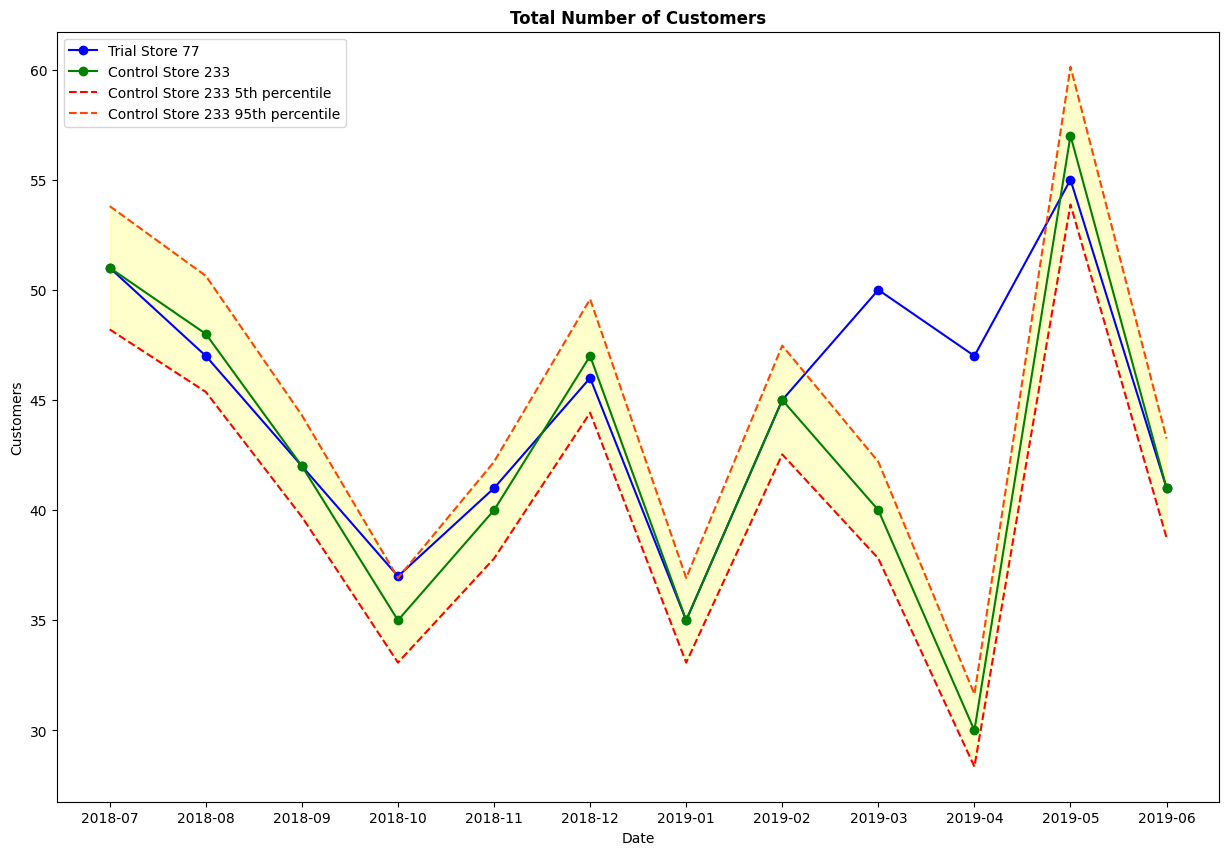

In [170]:
# plotting the graph
plt.figure(figsize = (15, 10))
plt.title('Total Number of Customers', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Customers')
plt.plot((NUMBER_OF_CUST_df.loc[NUMBER_OF_CUST_df['TYPE'] == 'Trial Store 77'])['MONTH_YR'], (NUMBER_OF_CUST_df.loc[NUMBER_OF_CUST_df['TYPE'] == 'Trial Store 77'])['NUMBER_OF_CUST'], marker = 'o', color = 'blue')
plt.plot((NUMBER_OF_CUST_df.loc[NUMBER_OF_CUST_df['TYPE'] == 'Control Store 233'])['MONTH_YR'], (NUMBER_OF_CUST_df.loc[NUMBER_OF_CUST_df['TYPE'] == 'Control Store 233'])['NUMBER_OF_CUST'], marker = 'o', color = 'green')
plt.plot(NUMBER_OF_CUST_5_df['MONTH_YR'], NUMBER_OF_CUST_5_df['NUMBER_OF_CUST'], linestyle = '--', color = 'red')
plt.plot(NUMBER_OF_CUST_95_df['MONTH_YR'], NUMBER_OF_CUST_95_df['NUMBER_OF_CUST'], linestyle = '--', color = 'orangered')
plt.legend(['Trial Store 77', 'Control Store 233', 'Control Store 233 5th percentile', 'Control Store 233 95th percentile'])
plt.fill_between(NUMBER_OF_CUST_95_df['MONTH_YR'], NUMBER_OF_CUST_95_df['NUMBER_OF_CUST'], NUMBER_OF_CUST_5_df['NUMBER_OF_CUST'], color = 'yellow', alpha = 0.2)
plt.savefig('visualisations1/Total_Customers_Conf_77.png')
plt.show()

- Store 77's control store was found to be Store 233

There was a significant increase in total sales and total customers for Store 77 during March 2019 and April 2019 for the trial period which goes from February 2019 to April 2019. Both sales and customers exceeded the 95% threshold/interval of the control store, Store 233. The trial in Store 77 is significantly different (performed better) to Store 233 as a result.

- Thus, the trial performed in Store 77 proved to be successful

### Store 86

In [171]:
# correlation with control stores 
store_86_corr = get_correlation(trial_store = store_86, control_stores = control_stores)
store_86_md = get_magnitude_distance(trial_store = store_86, control_stores = control_stores)

# merge 
store_86_corr_md = store_86_corr.merge(store_86_md, on = ['Trial_Store', 'Control_Store'], how = 'left')

# combined score
store_86_corr_md['SALES_REV_cs'] = 0.5 * store_86_corr_md['SALES_REV_corr'] + 0.5 * store_86_corr_md['SALES_REV_md']
store_86_corr_md['NUMBER_OF_CUST_cs'] = 0.5 * store_86_corr_md['NUMBER_OF_CUST_corr'] + 0.5 * store_86_corr_md['NUMBER_OF_CUST_md']
store_86_corr_md['AVERAGE_NUM_OF_TRANS_PER_CUST_cs'] = 0.5 * store_86_corr_md['AVERAGE_NUM_OF_TRANS_PER_CUST_corr'] + 0.5 * store_86_corr_md['AVERAGE_NUM_OF_TRANS_PER_CUST_md']
store_86_corr_md['AVERAGE_QTY_PER_CUST_cs'] = 0.5 * store_86_corr_md['AVERAGE_QTY_PER_CUST_corr'] + 0.5 * store_86_corr_md['AVERAGE_QTY_PER_CUST_md']
store_86_corr_md['AVERAGE_SALES_REV_PER_CUST_cs'] = 0.5 * store_86_corr_md['AVERAGE_SALES_REV_PER_CUST_corr'] + 0.5 * store_86_corr_md['AVERAGE_SALES_REV_PER_CUST_md']

store_86_comb_sre = store_86_corr_md[['Trial_Store', 'Control_Store', 'SALES_REV_cs', 'NUMBER_OF_CUST_cs', 'AVERAGE_NUM_OF_TRANS_PER_CUST_cs', 'AVERAGE_QTY_PER_CUST_cs', 'AVERAGE_SALES_REV_PER_CUST_cs']]

# for SALES_REV and NUMBER_OF_CUST
store_86_comb_sre['Score'] = 0.5 * store_86_comb_sre['SALES_REV_cs'] + 0.5 * store_86_comb_sre['NUMBER_OF_CUST_cs'] 

store_86_sre = store_86_comb_sre[['Trial_Store', 'Control_Store', 'Score']]

store_86_sre.sort_values(by = ['Score'], ascending = False, inplace = True)

display(store_86_sre) 

print('The Control Store is: {}'.format(int(store_86_sre.iloc[0]['Control_Store'])))

display((store_86_sre.loc[store_86_sre['Control_Store'] == store_86_sre.iloc[0]['Control_Store']]).reset_index(drop = True))

,Trial_Store,Control_Store,Score
244,86,260,0.671052
136,86,147,0.634013
20,86,22,0.600960
144,86,155,0.596463
165,86,176,0.580210
...,...,...,...
59,86,63,-0.118263
254,86,270,-0.118786
109,86,120,-0.120976
21,86,23,-0.129171


The Control Store is: 260


,Trial_Store,Control_Store,Score
0,86,260,0.671052


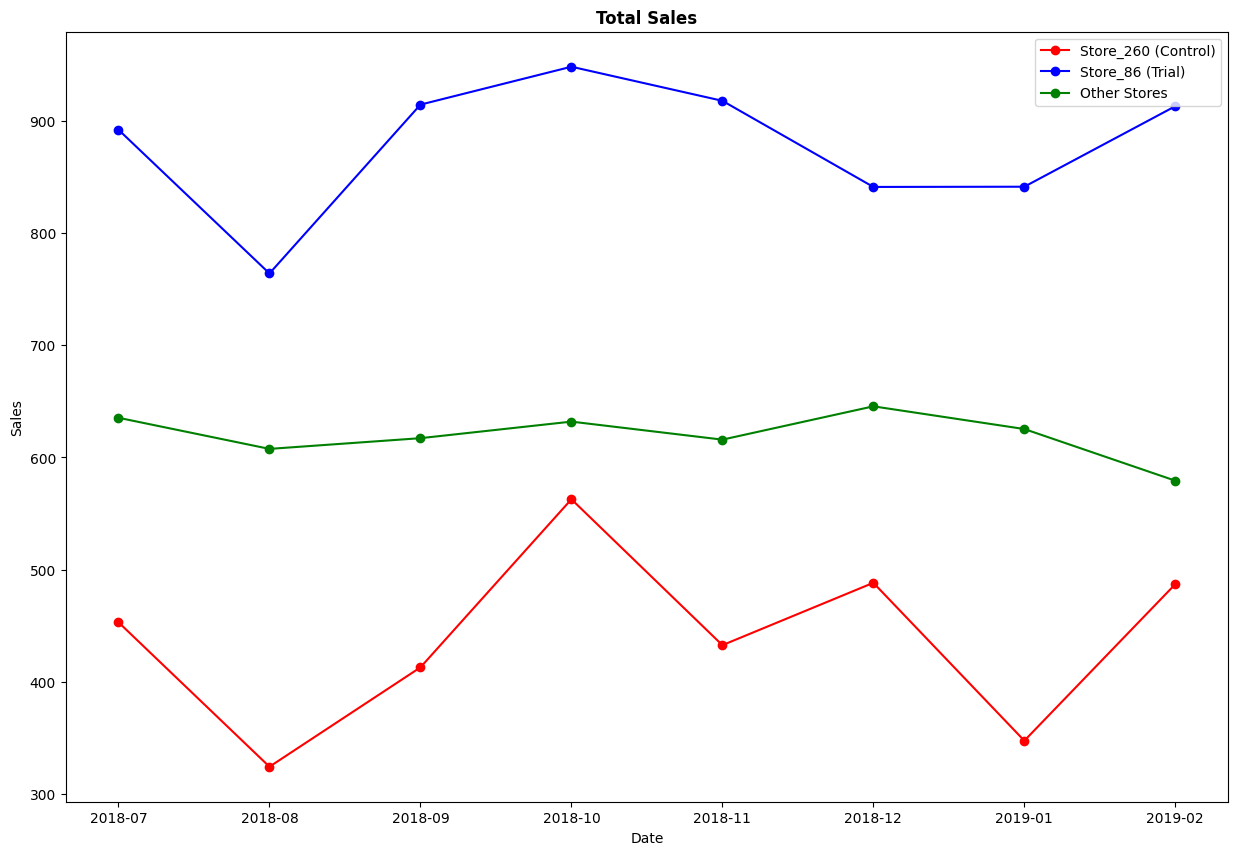

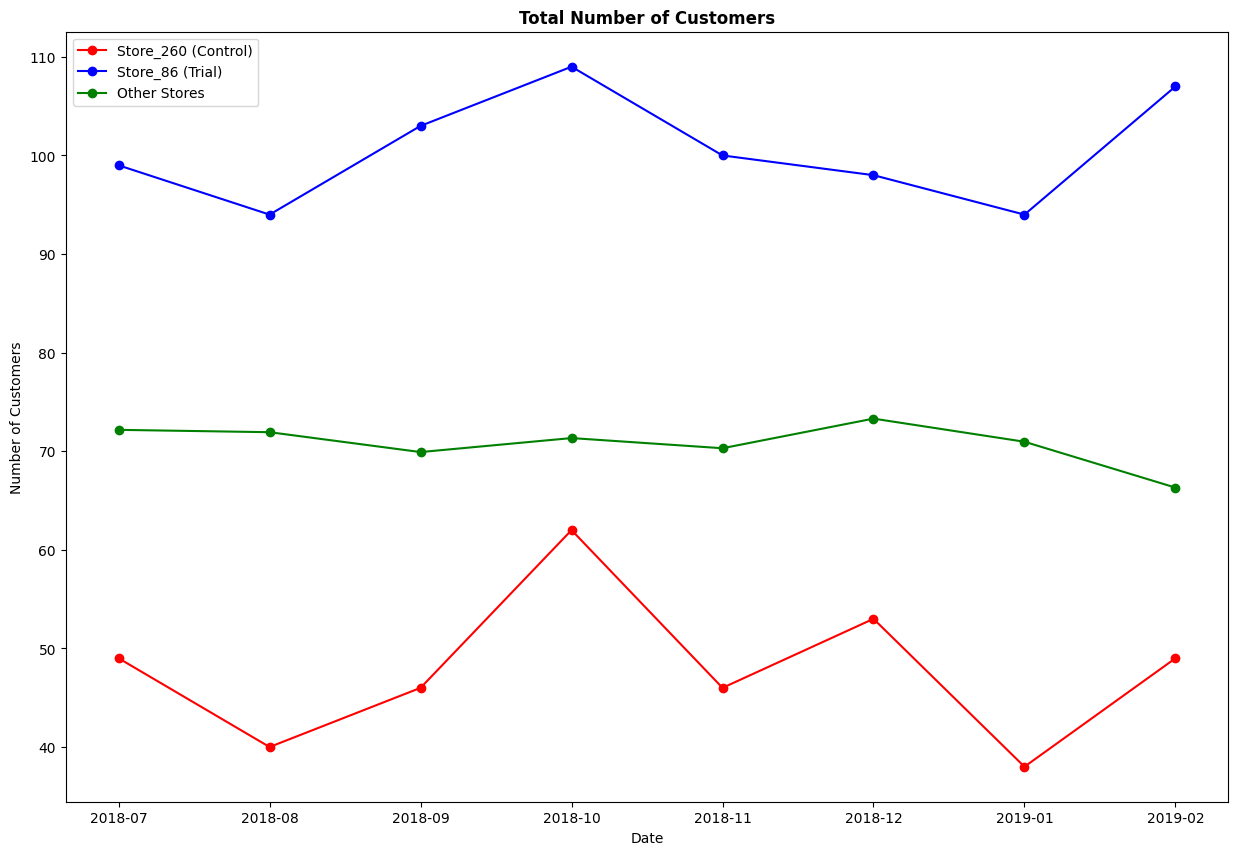

Visually from the two plots Store 260 is not a good control store even though it has the highest score. As such the next highest control scores will be visually tested to see if they are a good control for Store 86.

After plotting the next highest scores (stores 147, 22, 155), Store 155 was found to be a good control store for Store 86.


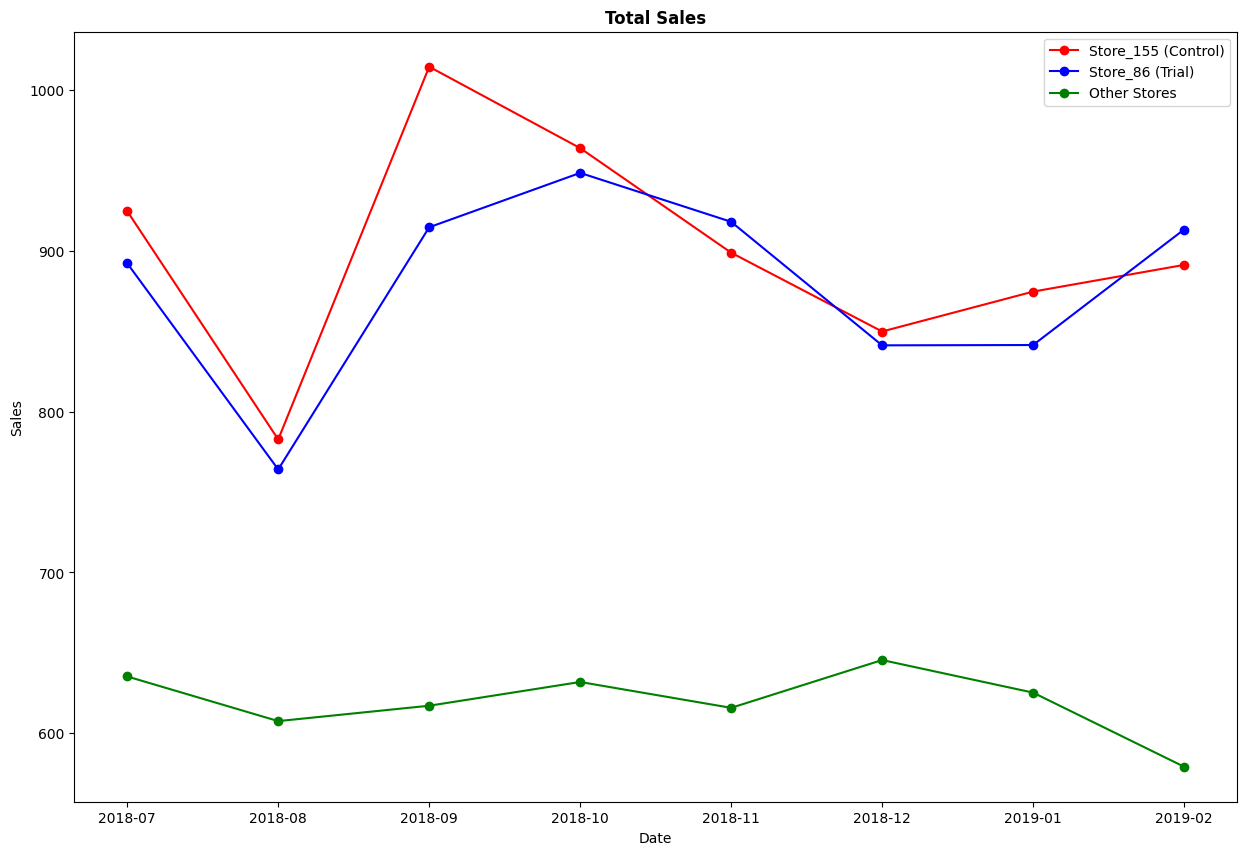

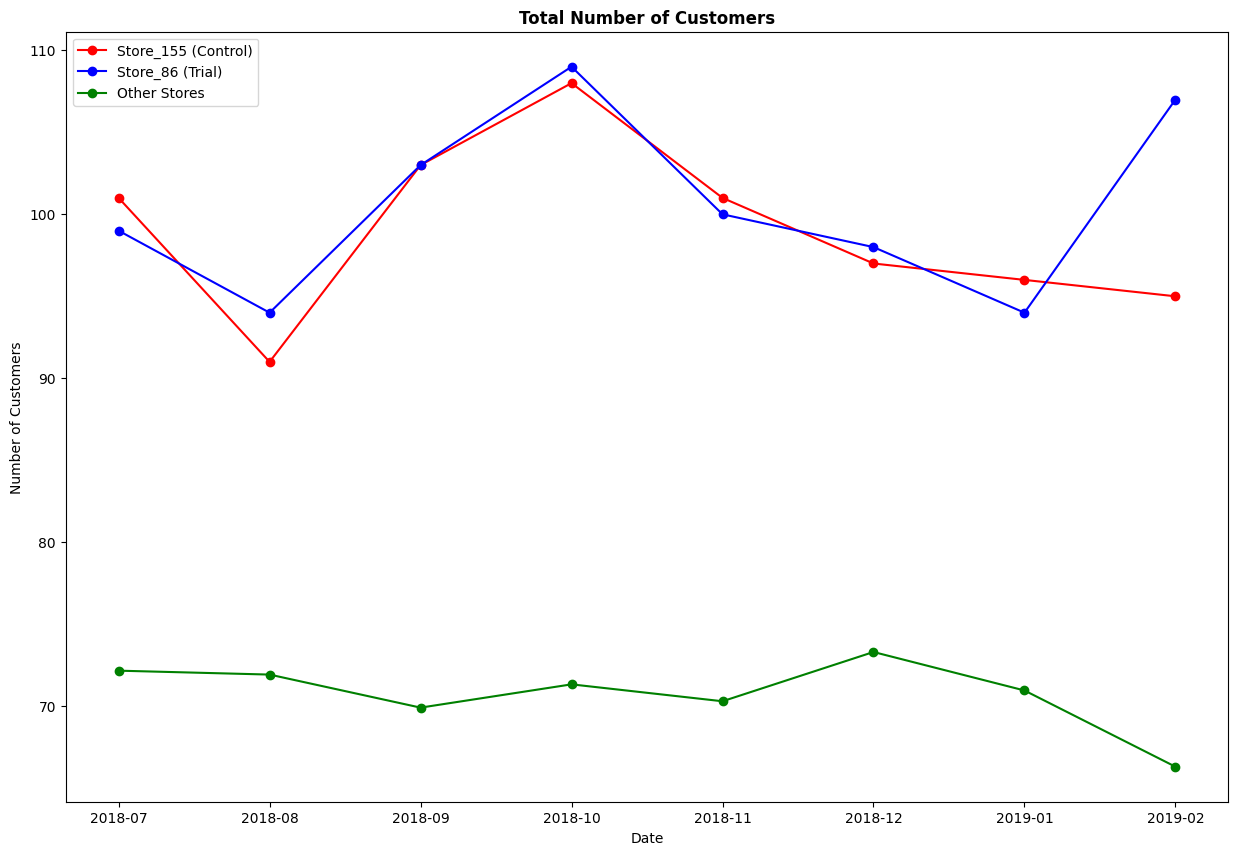

In [172]:
# plotting store 260 (control), store 86 (trial) and the other stores for SALES_REV & NUMBER_OF_CUST
oth_stores = brkdown_stores[~brkdown_stores['STORE_NBR'].isin([int(store_86_sre.iloc[0]['Control_Store']), 77, 86, 88])]

unq_dates = oth_stores['MONTH_YR'].unique().tolist()

hold_sales_rev = []

for date in unq_dates:
    df_dt = brkdown_stores.loc[brkdown_stores['MONTH_YR'] == date]

    hold_sales_rev.append(df_dt['SALES_REV'].mean())

hold_cust_cnt = []

for date in unq_dates:
    df_dt = brkdown_stores.loc[brkdown_stores['MONTH_YR'] == date]

    hold_cust_cnt.append(df_dt['NUMBER_OF_CUST'].mean())

plt.figure(figsize = (15, 10))
plt.title('Total Sales', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(brkdown_stores.loc[brkdown_stores['STORE_NBR'] == int(store_86_sre.iloc[0]['Control_Store'])]['MONTH_YR'], brkdown_stores.loc[brkdown_stores['STORE_NBR'] == int(store_86_sre.iloc[0]['Control_Store'])]['SALES_REV'], marker = 'o', color = 'red')
plt.plot(store_86['MONTH_YR'], store_86['SALES_REV'], marker = 'o', color = 'blue')
plt.plot(unq_dates, hold_sales_rev, marker = 'o', color = 'green')
plt.legend(['Store_260 (Control)', 'Store_86 (Trial)', 'Other Stores'])
plt.savefig('visualisations1/Total_Sales_86.png')
plt.show()

plt.figure(figsize = (15, 10))
plt.title('Total Number of Customers', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.plot(brkdown_stores.loc[brkdown_stores['STORE_NBR'] == int(store_86_sre.iloc[0]['Control_Store'])]['MONTH_YR'], brkdown_stores.loc[brkdown_stores['STORE_NBR'] == int(store_86_sre.iloc[0]['Control_Store'])]['NUMBER_OF_CUST'], marker = 'o', color = 'red')
plt.plot(store_86['MONTH_YR'], store_86['NUMBER_OF_CUST'], marker = 'o', color = 'blue')
plt.plot(unq_dates, hold_cust_cnt, marker = 'o', color = 'green')
plt.legend(['Store_260 (Control)', 'Store_86 (Trial)', 'Other Stores'])
plt.savefig('visualisations1/Total_Customers_86.png')
plt.show()

print('Visually from the two plots Store 260 is not a good control store even though it has the highest score. As such the next highest control scores will be visually tested to see if they are a good control for Store 86.')
print('')
print('After plotting the next highest scores (stores 147, 22, 155), Store 155 was found to be a good control store for Store 86.')

# new control store, Store 155
oth_stores = brkdown_stores[~brkdown_stores['STORE_NBR'].isin([155, 77, 86, 88])]

unq_dates = oth_stores['MONTH_YR'].unique().tolist()

hold_sales_rev = []

for date in unq_dates:
    df_dt = brkdown_stores.loc[brkdown_stores['MONTH_YR'] == date]

    hold_sales_rev.append(df_dt['SALES_REV'].mean())

hold_cust_cnt = []

for date in unq_dates:
    df_dt = brkdown_stores.loc[brkdown_stores['MONTH_YR'] == date]

    hold_cust_cnt.append(df_dt['NUMBER_OF_CUST'].mean())

plt.figure(figsize = (15, 10))
plt.title('Total Sales', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(brkdown_stores.loc[brkdown_stores['STORE_NBR'] == 155]['MONTH_YR'], brkdown_stores.loc[brkdown_stores['STORE_NBR'] == 155]['SALES_REV'], marker = 'o', color = 'red')
plt.plot(store_86['MONTH_YR'], store_86['SALES_REV'], marker = 'o', color = 'blue')
plt.plot(unq_dates, hold_sales_rev, marker = 'o', color = 'green')
plt.legend(['Store_155 (Control)', 'Store_86 (Trial)', 'Other Stores'])
plt.savefig('visualisations1/Total_Sales_86.png')
plt.show()

plt.figure(figsize = (15, 10))
plt.title('Total Number of Customers', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.plot(brkdown_stores.loc[brkdown_stores['STORE_NBR'] == 155]['MONTH_YR'], brkdown_stores.loc[brkdown_stores['STORE_NBR'] == 155]['NUMBER_OF_CUST'], marker = 'o', color = 'red')
plt.plot(store_86['MONTH_YR'], store_86['NUMBER_OF_CUST'], marker = 'o', color = 'blue')
plt.plot(unq_dates, hold_cust_cnt, marker = 'o', color = 'green')
plt.legend(['Store_155 (Control)', 'Store_86 (Trial)', 'Other Stores'])
plt.savefig('visualisations1/Total_Customers_86.png')
plt.show()

In [173]:
# assessment of trial for SALES_REV
brkdown_stores_for_86 = brkdown_stores1

# trial period from Feb 2019 - Apr 2019
brkdown_stores_for_86_b4 = brkdown_stores_for_86.loc[brkdown_stores_for_86['MONTH_YR'] < '2019-02']

scale_num = (brkdown_stores_for_86_b4.loc[brkdown_stores_for_86_b4['STORE_NBR'] == 86])['SALES_REV'].sum() / (brkdown_stores_for_86_b4.loc[brkdown_stores_for_86_b4['STORE_NBR'] == 155])['SALES_REV'].sum()

brkdown_stores_for_86['SCALED_SALES_REV'] = brkdown_stores_for_86['SALES_REV'] * scale_num

display((brkdown_stores_for_86.loc[brkdown_stores_for_86['STORE_NBR'] == 155]).reset_index(drop = True))

,STORE_NBR,MONTH,MONTH_YR,SALES_REV,NUMBER_OF_CUST,AVERAGE_NUM_OF_TRANS_PER_CUST,AVERAGE_QTY_PER_CUST,AVERAGE_SALES_REV_PER_CUST,SCALED_SALES_REV,SCALED_NUMBER_OF_CUST
0,155,07,2018-07,924.60,101,1.237624,2.475248,9.154455,896.922236,101.338926
1,155,08,2018-08,782.70,91,1.318681,2.516484,8.601099,759.269991,91.305369
2,155,09,2018-09,1014.40,103,1.407767,2.815534,9.848544,984.034086,103.345638
3,155,10,2018-10,963.80,108,1.259259,2.518519,8.924074,934.948790,108.362416
4,155,11,2018-11,898.80,101,1.336634,2.673267,8.899010,871.894555,101.338926
5,155,12,2018-12,849.80,97,1.247423,2.494845,8.760825,824.361363,97.325503
6,155,01,2019-01,874.60,96,1.312500,2.625000,9.110417,848.418979,96.322148
7,155,02,2019-02,891.20,95,1.336842,2.673684,9.381053,864.522060,95.318792
8,155,03,2019-03,804.40,94,1.276596,2.553191,8.557447,780.320405,94.315436
9,155,04,2019-04,844.60,99,1.222222,2.444444,8.531313,819.317024,99.332215


In [174]:
# percentage difference between trial's SALES_REV and control store's SCALED_SALES_REV
percent_diff_df = (brkdown_stores_for_86.loc[brkdown_stores_for_86['STORE_NBR'] == 86])[['MONTH_YR', 'SALES_REV']].merge((brkdown_stores_for_86.loc[brkdown_stores_for_86['STORE_NBR'] == 155])[['MONTH_YR', 'SCALED_SALES_REV']], on = 'MONTH_YR', how = 'left')

def get_percent_diff(trial_sales, control_sales):

    diff = (trial_sales - control_sales) / control_sales

    return diff

percent_diff_df['PERCENT_DIFF'] = percent_diff_df.apply(lambda i: get_percent_diff(i['SALES_REV'], i['SCALED_SALES_REV']), axis = 1)

percent_diff_df

,MONTH_YR,SALES_REV,SCALED_SALES_REV,PERCENT_DIFF
0,2018-07,892.20,896.922236,-0.005265
1,2018-08,764.05,759.269991,0.006296
2,2018-09,914.60,984.034086,-0.070561
3,2018-10,948.40,934.948790,0.014387
4,2018-11,918.00,871.894555,0.052880
5,2018-12,841.20,824.361363,0.020426
6,2019-01,841.40,848.418979,-0.008273
7,2019-02,913.20,864.522060,0.056306
8,2019-03,1026.80,780.320405,0.315870
9,2019-04,848.20,819.317024,0.035253


In [175]:
# t-test, H0: trial = control vs H1: trial != control 

# the test statistic: PERCENT_DIFF / standard deviation of PERCENT_DIFF
# degrees of freedom is 8 (months) - 1 = 7
# 95th percentile 
percent_diff_df['TEST_STAT'] = abs(percent_diff_df['PERCENT_DIFF'] / ((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()))

percent_diff_df['CRITICAL_VAL'] = scipy.stats.t.ppf(q = 0.95, df = 7)

display(percent_diff_df)

print('TEST_STAT for this MONTH_YR is significantly larger than the 95th percentile value of the t-distribution')

display((percent_diff_df[percent_diff_df['MONTH_YR'].isin(['2019-03'])])[['MONTH_YR', 'TEST_STAT', 'CRITICAL_VAL']].reset_index(drop = True))

,MONTH_YR,SALES_REV,SCALED_SALES_REV,PERCENT_DIFF,TEST_STAT,CRITICAL_VAL
0,2018-07,892.20,896.922236,-0.005265,0.139708,1.894579
1,2018-08,764.05,759.269991,0.006296,0.167055,1.894579
2,2018-09,914.60,984.034086,-0.070561,1.872364,1.894579
3,2018-10,948.40,934.948790,0.014387,0.381770,1.894579
4,2018-11,918.00,871.894555,0.052880,1.403188,1.894579
5,2018-12,841.20,824.361363,0.020426,0.542022,1.894579
6,2019-01,841.40,848.418979,-0.008273,0.219529,1.894579
7,2019-02,913.20,864.522060,0.056306,1.494114,1.894579
8,2019-03,1026.80,780.320405,0.315870,8.381769,1.894579
9,2019-04,848.20,819.317024,0.035253,0.935444,1.894579


TEST_STAT for this MONTH_YR is significantly larger than the 95th percentile value of the t-distribution


,MONTH_YR,TEST_STAT,CRITICAL_VAL
0,2019-03,8.381769,1.894579


In [176]:
# constructing the dfs for the plots 
SALES_REV_df = percent_diff_df[['MONTH_YR', 'SALES_REV']]
SALES_REV_df['TYPE'] = 'Trial Store 86'
SALES_REV_df = SALES_REV_df[['TYPE', 'MONTH_YR', 'SALES_REV']]
SALES_REV_df = pd.concat([SALES_REV_df, (brkdown_stores_for_86.loc[brkdown_stores_for_86['STORE_NBR'] == 155])[['MONTH_YR', 'SALES_REV']]])
SALES_REV_df.fillna('Control Store 155', inplace = True)
SALES_REV_df.reset_index(drop = True, inplace = True)

display(SALES_REV_df)

SALES_REV_95_df = (brkdown_stores_for_86.loc[brkdown_stores_for_86['STORE_NBR'] == 155])[['MONTH_YR', 'SALES_REV']]
SALES_REV_95_df['TYPE'] = 'Control Store 155 95th percentile'
SALES_REV_95_df['SALES_REV'] = SALES_REV_95_df['SALES_REV'] * (1 + (((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()) * 2))
SALES_REV_95_df = SALES_REV_95_df[['TYPE', 'MONTH_YR', 'SALES_REV']]

display(SALES_REV_95_df)

SALES_REV_5_df = (brkdown_stores_for_86.loc[brkdown_stores_for_86['STORE_NBR'] == 155])[['MONTH_YR', 'SALES_REV']]
SALES_REV_5_df['TYPE'] = 'Control Store 155 5th percentile'
SALES_REV_5_df['SALES_REV'] = SALES_REV_5_df['SALES_REV'] * (1 - (((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()) * 2))
SALES_REV_5_df = SALES_REV_5_df[['TYPE', 'MONTH_YR', 'SALES_REV']]

display(SALES_REV_5_df)

,TYPE,MONTH_YR,SALES_REV
0,Trial Store 86,2018-07,892.20
1,Trial Store 86,2018-08,764.05
2,Trial Store 86,2018-09,914.60
3,Trial Store 86,2018-10,948.40
4,Trial Store 86,2018-11,918.00
5,Trial Store 86,2018-12,841.20
6,Trial Store 86,2019-01,841.40
7,Trial Store 86,2019-02,913.20
8,Trial Store 86,2019-03,1026.80
9,Trial Store 86,2019-04,848.20


,TYPE,MONTH_YR,SALES_REV
1799,Control Store 155 95th percentile,2018-07,994.287708
1800,Control Store 155 95th percentile,2018-08,841.692612
1801,Control Store 155 95th percentile,2018-09,1090.855993
1802,Control Store 155 95th percentile,2018-10,1036.442238
1803,Control Store 155 95th percentile,2018-11,966.543145
1804,Control Store 155 95th percentile,2018-12,913.849983
1793,Control Store 155 95th percentile,2019-01,940.519176
1794,Control Store 155 95th percentile,2019-02,958.370328
1795,Control Store 155 95th percentile,2019-03,865.028156
1796,Control Store 155 95th percentile,2019-04,908.258056


,TYPE,MONTH_YR,SALES_REV
1799,Control Store 155 5th percentile,2018-07,854.912292
1800,Control Store 155 5th percentile,2018-08,723.707388
1801,Control Store 155 5th percentile,2018-09,937.944007
1802,Control Store 155 5th percentile,2018-10,891.157762
1803,Control Store 155 5th percentile,2018-11,831.056855
1804,Control Store 155 5th percentile,2018-12,785.750017
1793,Control Store 155 5th percentile,2019-01,808.680824
1794,Control Store 155 5th percentile,2019-02,824.029672
1795,Control Store 155 5th percentile,2019-03,743.771844
1796,Control Store 155 5th percentile,2019-04,780.941944


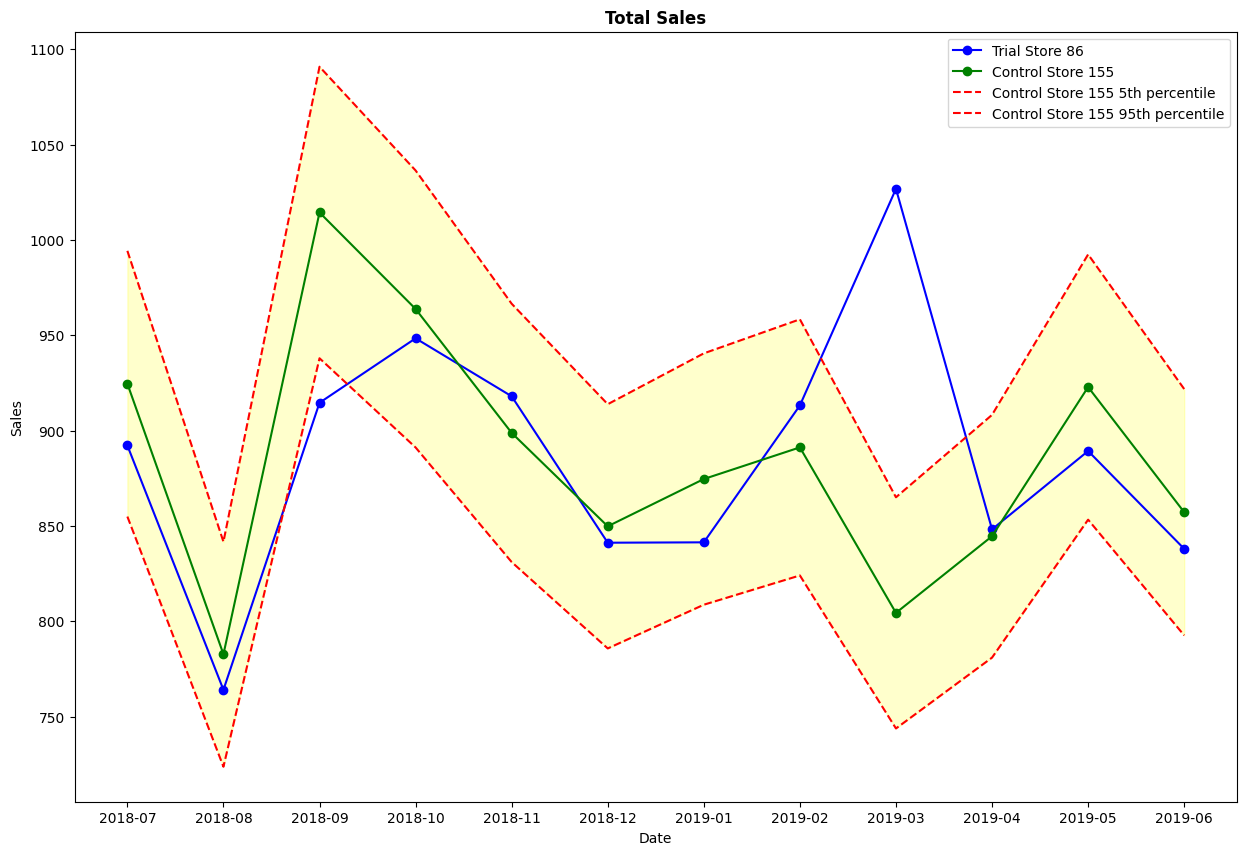

In [177]:
# plotting the graph
plt.figure(figsize = (15, 10))
plt.title('Total Sales', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot((SALES_REV_df.loc[SALES_REV_df['TYPE'] == 'Trial Store 86'])['MONTH_YR'], (SALES_REV_df.loc[SALES_REV_df['TYPE'] == 'Trial Store 86'])['SALES_REV'], marker = 'o', color = 'blue')
plt.plot((SALES_REV_df.loc[SALES_REV_df['TYPE'] == 'Control Store 155'])['MONTH_YR'], (SALES_REV_df.loc[SALES_REV_df['TYPE'] == 'Control Store 155'])['SALES_REV'], marker = 'o', color = 'green')
plt.plot(SALES_REV_5_df['MONTH_YR'], SALES_REV_5_df['SALES_REV'], linestyle = '--', color = 'red')
plt.plot(SALES_REV_95_df['MONTH_YR'], SALES_REV_95_df['SALES_REV'], linestyle = '--', color = 'red')
plt.legend(['Trial Store 86', 'Control Store 155', 'Control Store 155 5th percentile', 'Control Store 155 95th percentile'])
plt.fill_between(SALES_REV_95_df['MONTH_YR'], SALES_REV_95_df['SALES_REV'], SALES_REV_5_df['SALES_REV'], color = 'yellow', alpha = 0.2)
plt.savefig('visualisations1/Total_Sales_Conf_86.png')
plt.show()

In [178]:
# assessment of trial for NUMBER_OF_CUST
brkdown_stores_for_86 = brkdown_stores1

# trial period from Feb 2019 - Apr 2019
brkdown_stores_for_86_b4 = brkdown_stores_for_86.loc[brkdown_stores_for_86['MONTH_YR'] < '2019-02']

scale_num = (brkdown_stores_for_86_b4.loc[brkdown_stores_for_86_b4['STORE_NBR'] == 86])['NUMBER_OF_CUST'].sum() / (brkdown_stores_for_86_b4.loc[brkdown_stores_for_86_b4['STORE_NBR'] == 155])['NUMBER_OF_CUST'].sum()

brkdown_stores_for_86['SCALED_NUMBER_OF_CUST'] = brkdown_stores_for_86['NUMBER_OF_CUST'] * scale_num

display((brkdown_stores_for_86.loc[brkdown_stores_for_86['STORE_NBR'] == 155]).reset_index(drop = True))

,STORE_NBR,MONTH,MONTH_YR,SALES_REV,NUMBER_OF_CUST,AVERAGE_NUM_OF_TRANS_PER_CUST,AVERAGE_QTY_PER_CUST,AVERAGE_SALES_REV_PER_CUST,SCALED_SALES_REV,SCALED_NUMBER_OF_CUST
0,155,07,2018-07,924.60,101,1.237624,2.475248,9.154455,896.922236,101.0
1,155,08,2018-08,782.70,91,1.318681,2.516484,8.601099,759.269991,91.0
2,155,09,2018-09,1014.40,103,1.407767,2.815534,9.848544,984.034086,103.0
3,155,10,2018-10,963.80,108,1.259259,2.518519,8.924074,934.948790,108.0
4,155,11,2018-11,898.80,101,1.336634,2.673267,8.899010,871.894555,101.0
5,155,12,2018-12,849.80,97,1.247423,2.494845,8.760825,824.361363,97.0
6,155,01,2019-01,874.60,96,1.312500,2.625000,9.110417,848.418979,96.0
7,155,02,2019-02,891.20,95,1.336842,2.673684,9.381053,864.522060,95.0
8,155,03,2019-03,804.40,94,1.276596,2.553191,8.557447,780.320405,94.0
9,155,04,2019-04,844.60,99,1.222222,2.444444,8.531313,819.317024,99.0


In [179]:
# percentage difference between trial's NUMBER_OF_CUST and control store's SCALED_NUMBER_OF_CUST
percent_diff_df = (brkdown_stores_for_86.loc[brkdown_stores_for_86['STORE_NBR'] == 86])[['MONTH_YR', 'NUMBER_OF_CUST']].merge((brkdown_stores_for_86.loc[brkdown_stores_for_86['STORE_NBR'] == 155])[['MONTH_YR', 'SCALED_NUMBER_OF_CUST']], on = 'MONTH_YR', how = 'left')

def get_percent_diff(trial_cust, control_cust):

    diff = (trial_cust - control_cust) / control_cust

    return diff

percent_diff_df['PERCENT_DIFF'] = percent_diff_df.apply(lambda i: get_percent_diff(i['NUMBER_OF_CUST'], i['SCALED_NUMBER_OF_CUST']), axis = 1)

percent_diff_df

,MONTH_YR,NUMBER_OF_CUST,SCALED_NUMBER_OF_CUST,PERCENT_DIFF
0,2018-07,99,101.0,-0.019802
1,2018-08,94,91.0,0.032967
2,2018-09,103,103.0,0.000000
3,2018-10,109,108.0,0.009259
4,2018-11,100,101.0,-0.009901
5,2018-12,98,97.0,0.010309
6,2019-01,94,96.0,-0.020833
7,2019-02,107,95.0,0.126316
8,2019-03,115,94.0,0.223404
9,2019-04,105,99.0,0.060606


In [180]:
# t-test, H0: trial = control vs H1: trial != control 

# the test statistic: PERCENT_DIFF / standard deviation of PERCENT_DIFF
# degrees of freedom is 8 (months) - 1 = 7
# 95th percentile 
percent_diff_df['TEST_STAT'] = abs(percent_diff_df['PERCENT_DIFF'] / ((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()))

percent_diff_df['CRITICAL_VAL'] = scipy.stats.t.ppf(q = 0.95, df = 7)

display(percent_diff_df)

print('TEST_STAT for these MONTH_YRs is significantly larger than the 95th percentile value of the t-distribution')

display((percent_diff_df[percent_diff_df['MONTH_YR'].isin(['2019-03', '2019-04'])])[['MONTH_YR', 'TEST_STAT', 'CRITICAL_VAL']].reset_index(drop = True))

,MONTH_YR,NUMBER_OF_CUST,SCALED_NUMBER_OF_CUST,PERCENT_DIFF,TEST_STAT,CRITICAL_VAL
0,2018-07,99,101.0,-0.019802,1.033550,1.894579
1,2018-08,94,91.0,0.032967,1.720691,1.894579
2,2018-09,103,103.0,0.000000,0.000000,1.894579
3,2018-10,109,108.0,0.009259,0.483281,1.894579
4,2018-11,100,101.0,-0.009901,0.516775,1.894579
5,2018-12,98,97.0,0.010309,0.538086,1.894579
6,2019-01,94,96.0,-0.020833,1.087381,1.894579
7,2019-02,107,95.0,0.126316,6.592964,1.894579
8,2019-03,115,94.0,0.223404,11.660429,1.894579
9,2019-04,105,99.0,0.060606,3.163291,1.894579


TEST_STAT for these MONTH_YRs is significantly larger than the 95th percentile value of the t-distribution


,MONTH_YR,TEST_STAT,CRITICAL_VAL
0,2019-03,11.660429,1.894579
1,2019-04,3.163291,1.894579


In [181]:
# constructing the dfs for the plots 
NUMBER_OF_CUST_df = percent_diff_df[['MONTH_YR', 'NUMBER_OF_CUST']]
NUMBER_OF_CUST_df['TYPE'] = 'Trial Store 86'
NUMBER_OF_CUST_df = NUMBER_OF_CUST_df[['TYPE', 'MONTH_YR', 'NUMBER_OF_CUST']]
NUMBER_OF_CUST_df = pd.concat([NUMBER_OF_CUST_df, (brkdown_stores_for_86.loc[brkdown_stores_for_86['STORE_NBR'] == 155])[['MONTH_YR', 'NUMBER_OF_CUST']]])
NUMBER_OF_CUST_df.fillna('Control Store 155', inplace = True)
NUMBER_OF_CUST_df.reset_index(drop = True, inplace = True)

display(NUMBER_OF_CUST_df)

NUMBER_OF_CUST_95_df = (brkdown_stores_for_86.loc[brkdown_stores_for_86['STORE_NBR'] == 155])[['MONTH_YR', 'NUMBER_OF_CUST']]
NUMBER_OF_CUST_95_df['TYPE'] = 'Control Store 155 95th percentile'
NUMBER_OF_CUST_95_df['NUMBER_OF_CUST'] = NUMBER_OF_CUST_95_df['NUMBER_OF_CUST'] * (1 + (((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()) * 2))
NUMBER_OF_CUST_95_df = NUMBER_OF_CUST_95_df[['TYPE', 'MONTH_YR', 'NUMBER_OF_CUST']]

display(NUMBER_OF_CUST_95_df)

NUMBER_OF_CUST_5_df = (brkdown_stores_for_86.loc[brkdown_stores_for_86['STORE_NBR'] == 155])[['MONTH_YR', 'NUMBER_OF_CUST']]
NUMBER_OF_CUST_5_df['TYPE'] = 'Control Store 155 5th percentile'
NUMBER_OF_CUST_5_df['NUMBER_OF_CUST'] = NUMBER_OF_CUST_5_df['NUMBER_OF_CUST'] * (1 - (((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()) * 2))
NUMBER_OF_CUST_5_df = NUMBER_OF_CUST_5_df[['TYPE', 'MONTH_YR', 'NUMBER_OF_CUST']]

display(NUMBER_OF_CUST_5_df)

,TYPE,MONTH_YR,NUMBER_OF_CUST
0,Trial Store 86,2018-07,99
1,Trial Store 86,2018-08,94
2,Trial Store 86,2018-09,103
3,Trial Store 86,2018-10,109
4,Trial Store 86,2018-11,100
5,Trial Store 86,2018-12,98
6,Trial Store 86,2019-01,94
7,Trial Store 86,2019-02,107
8,Trial Store 86,2019-03,115
9,Trial Store 86,2019-04,105


,TYPE,MONTH_YR,NUMBER_OF_CUST
1799,Control Store 155 95th percentile,2018-07,104.870154
1800,Control Store 155 95th percentile,2018-08,94.486971
1801,Control Store 155 95th percentile,2018-09,106.946791
1802,Control Store 155 95th percentile,2018-10,112.138383
1803,Control Store 155 95th percentile,2018-11,104.870154
1804,Control Store 155 95th percentile,2018-12,100.716881
1793,Control Store 155 95th percentile,2019-01,99.678563
1794,Control Store 155 95th percentile,2019-02,98.640244
1795,Control Store 155 95th percentile,2019-03,97.601926
1796,Control Store 155 95th percentile,2019-04,102.793518


,TYPE,MONTH_YR,NUMBER_OF_CUST
1799,Control Store 155 5th percentile,2018-07,97.129846
1800,Control Store 155 5th percentile,2018-08,87.513029
1801,Control Store 155 5th percentile,2018-09,99.053209
1802,Control Store 155 5th percentile,2018-10,103.861617
1803,Control Store 155 5th percentile,2018-11,97.129846
1804,Control Store 155 5th percentile,2018-12,93.283119
1793,Control Store 155 5th percentile,2019-01,92.321437
1794,Control Store 155 5th percentile,2019-02,91.359756
1795,Control Store 155 5th percentile,2019-03,90.398074
1796,Control Store 155 5th percentile,2019-04,95.206482


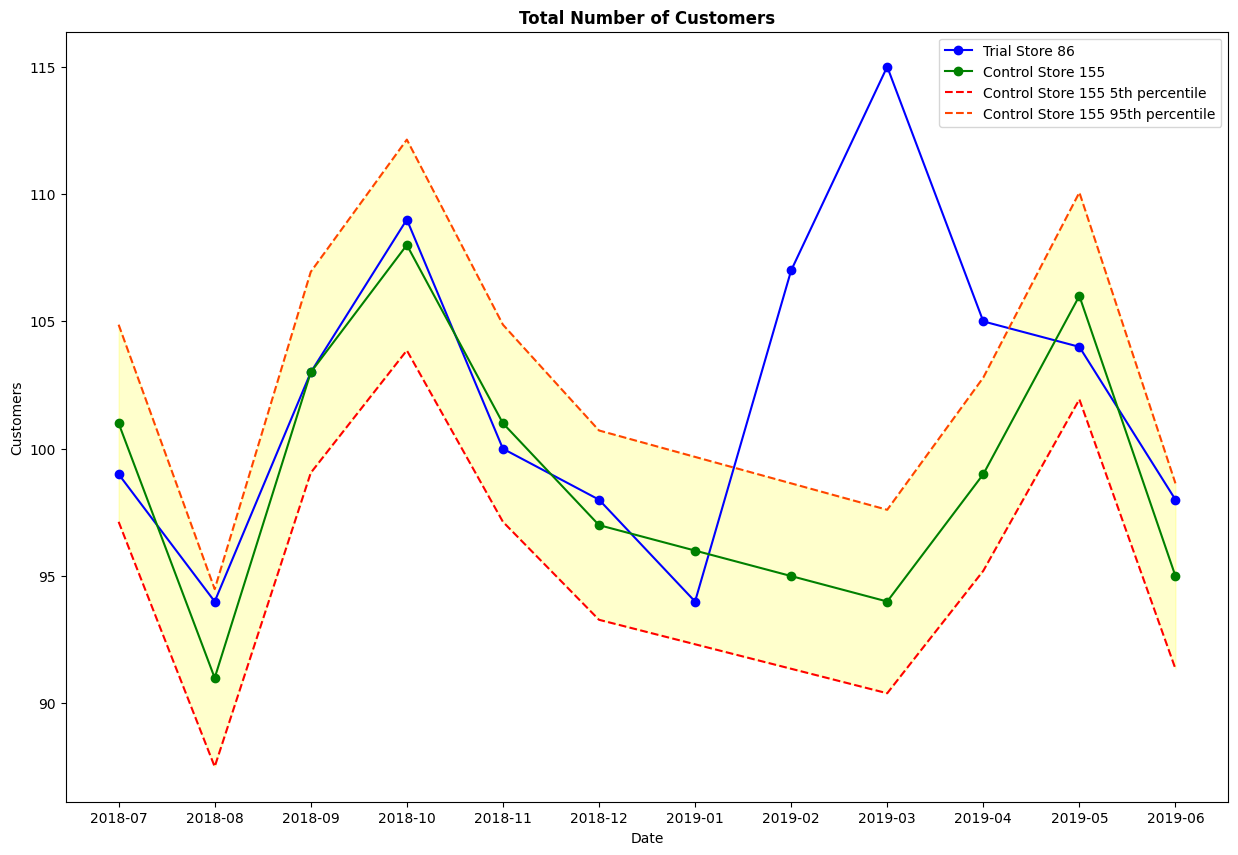

In [182]:
# plotting the graph
plt.figure(figsize = (15, 10))
plt.title('Total Number of Customers', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Customers')
plt.plot((NUMBER_OF_CUST_df.loc[NUMBER_OF_CUST_df['TYPE'] == 'Trial Store 86'])['MONTH_YR'], (NUMBER_OF_CUST_df.loc[NUMBER_OF_CUST_df['TYPE'] == 'Trial Store 86'])['NUMBER_OF_CUST'], marker = 'o', color = 'blue')
plt.plot((NUMBER_OF_CUST_df.loc[NUMBER_OF_CUST_df['TYPE'] == 'Control Store 155'])['MONTH_YR'], (NUMBER_OF_CUST_df.loc[NUMBER_OF_CUST_df['TYPE'] == 'Control Store 155'])['NUMBER_OF_CUST'], marker = 'o', color = 'green')
plt.plot(NUMBER_OF_CUST_5_df['MONTH_YR'], NUMBER_OF_CUST_5_df['NUMBER_OF_CUST'], linestyle = '--', color = 'red')
plt.plot(NUMBER_OF_CUST_95_df['MONTH_YR'], NUMBER_OF_CUST_95_df['NUMBER_OF_CUST'], linestyle = '--', color = 'orangered')
plt.legend(['Trial Store 86', 'Control Store 155', 'Control Store 155 5th percentile', 'Control Store 155 95th percentile'])
plt.fill_between(NUMBER_OF_CUST_95_df['MONTH_YR'], NUMBER_OF_CUST_95_df['NUMBER_OF_CUST'], NUMBER_OF_CUST_5_df['NUMBER_OF_CUST'], color = 'yellow', alpha = 0.2)
plt.savefig('visualisations1/Total_Customers_Conf_86.png')
plt.show()

- Store 86's control store was found to be Store 155 even though it did not have the highest control score

There was a significant increase in total sales for Store 86 in March 2019 for the trial period which goes from February 2019 to April 2019. There was also a significant increase in total customers for Store 86 for all months of the trial period. The total customers exceeded the 95% threshold/interval of the control store, Store 155. However, the total sales for 2 out of the 3 trial months did not exceed the 95% threshold/interval (remained inside the 5% and 95% interval). The trial in Store 86 for sales is not significantly different to Store 155 as a result of this. 

- There needs to be a query raised about the Store 86 trial if it was deployed differently to the other trial stores or if there is a data issue given that it only exceeded the 95% threshold/interval once out of the three months for total sales but exceeded the 95% threshold/interval for all months in terms of total customers 

- Thus, the trial performed in Store 86 proved to be successful for total customers and fairly successful for total sales but an investigation is necessary to determine the nature of the store's sales figures

### Store 88

In [183]:
# correlation with control stores 
store_88_corr = get_correlation(trial_store = store_88, control_stores = control_stores)
store_88_md = get_magnitude_distance(trial_store = store_88, control_stores = control_stores)

# merge 
store_88_corr_md = store_88_corr.merge(store_88_md, on = ['Trial_Store', 'Control_Store'], how = 'left')

# combined score
store_88_corr_md['SALES_REV_cs'] = 0.5 * store_88_corr_md['SALES_REV_corr'] + 0.5 * store_88_corr_md['SALES_REV_md']
store_88_corr_md['NUMBER_OF_CUST_cs'] = 0.5 * store_88_corr_md['NUMBER_OF_CUST_corr'] + 0.5 * store_88_corr_md['NUMBER_OF_CUST_md']
store_88_corr_md['AVERAGE_NUM_OF_TRANS_PER_CUST_cs'] = 0.5 * store_88_corr_md['AVERAGE_NUM_OF_TRANS_PER_CUST_corr'] + 0.5 * store_88_corr_md['AVERAGE_NUM_OF_TRANS_PER_CUST_md']
store_88_corr_md['AVERAGE_QTY_PER_CUST_cs'] = 0.5 * store_88_corr_md['AVERAGE_QTY_PER_CUST_corr'] + 0.5 * store_88_corr_md['AVERAGE_QTY_PER_CUST_md']
store_88_corr_md['AVERAGE_SALES_REV_PER_CUST_cs'] = 0.5 * store_88_corr_md['AVERAGE_SALES_REV_PER_CUST_corr'] + 0.5 * store_88_corr_md['AVERAGE_SALES_REV_PER_CUST_md']

store_88_comb_sre = store_88_corr_md[['Trial_Store', 'Control_Store', 'SALES_REV_cs', 'NUMBER_OF_CUST_cs', 'AVERAGE_NUM_OF_TRANS_PER_CUST_cs', 'AVERAGE_QTY_PER_CUST_cs', 'AVERAGE_SALES_REV_PER_CUST_cs']]

# for SALES_REV and NUMBER_OF_CUST
store_88_comb_sre['Score'] = 0.5 * store_88_comb_sre['SALES_REV_cs'] + 0.5 * store_88_comb_sre['NUMBER_OF_CUST_cs'] 

store_88_sre = store_88_comb_sre[['Trial_Store', 'Control_Store', 'Score']]

store_88_sre.sort_values(by = ['Score'], ascending = False, inplace = True)

display(store_88_sre) 

print('The Control Store is: {}'.format(int(store_88_sre.iloc[0]['Control_Store'])))

display((store_88_sre.loc[store_88_sre['Control_Store'] == store_88_sre.iloc[0]['Control_Store']]).reset_index(drop = True))

,Trial_Store,Control_Store,Score
167,88,178,0.657885
12,88,14,0.640705
222,88,237,0.596160
65,88,69,0.563104
156,88,167,0.557011
...,...,...,...
224,88,239,-0.007353
220,88,235,-0.007539
164,88,175,-0.016603
130,88,141,-0.019524


The Control Store is: 178


,Trial_Store,Control_Store,Score
0,88,178,0.657885


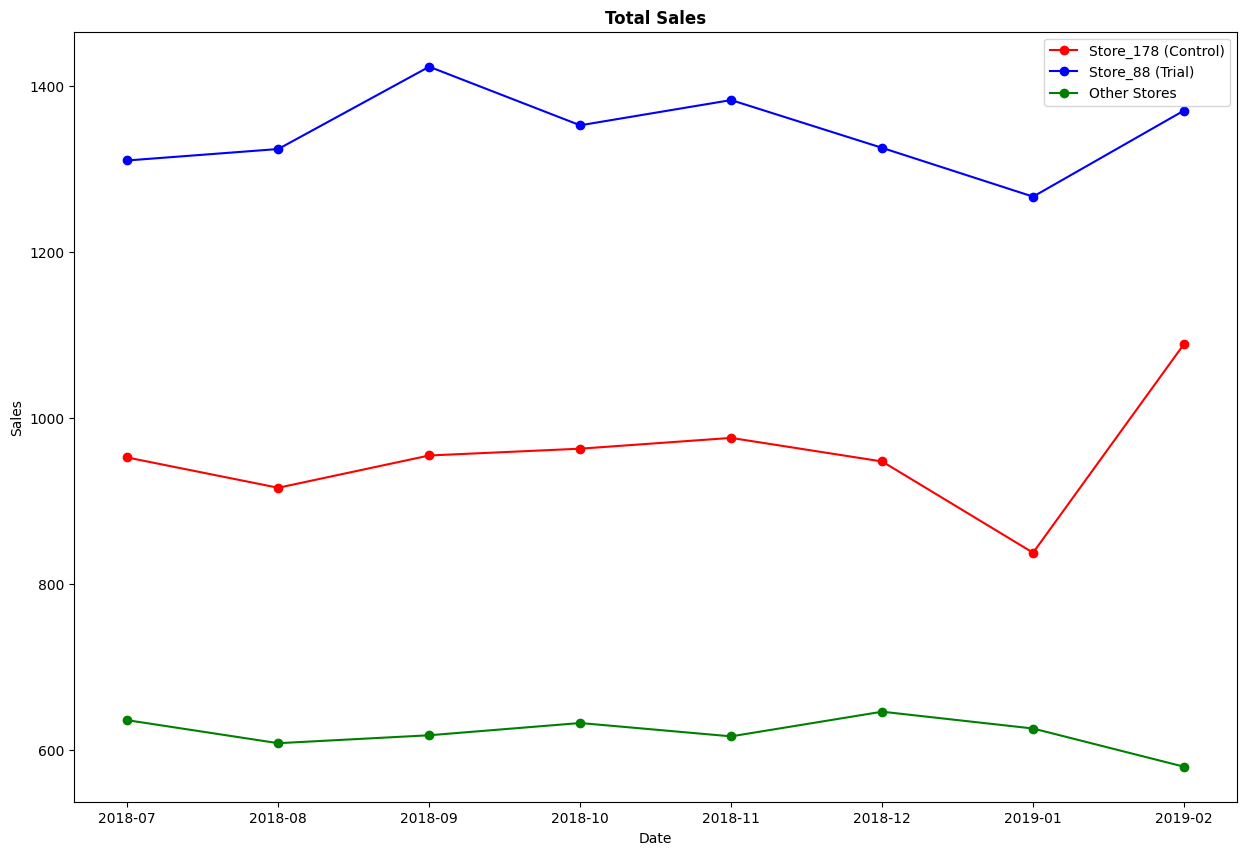

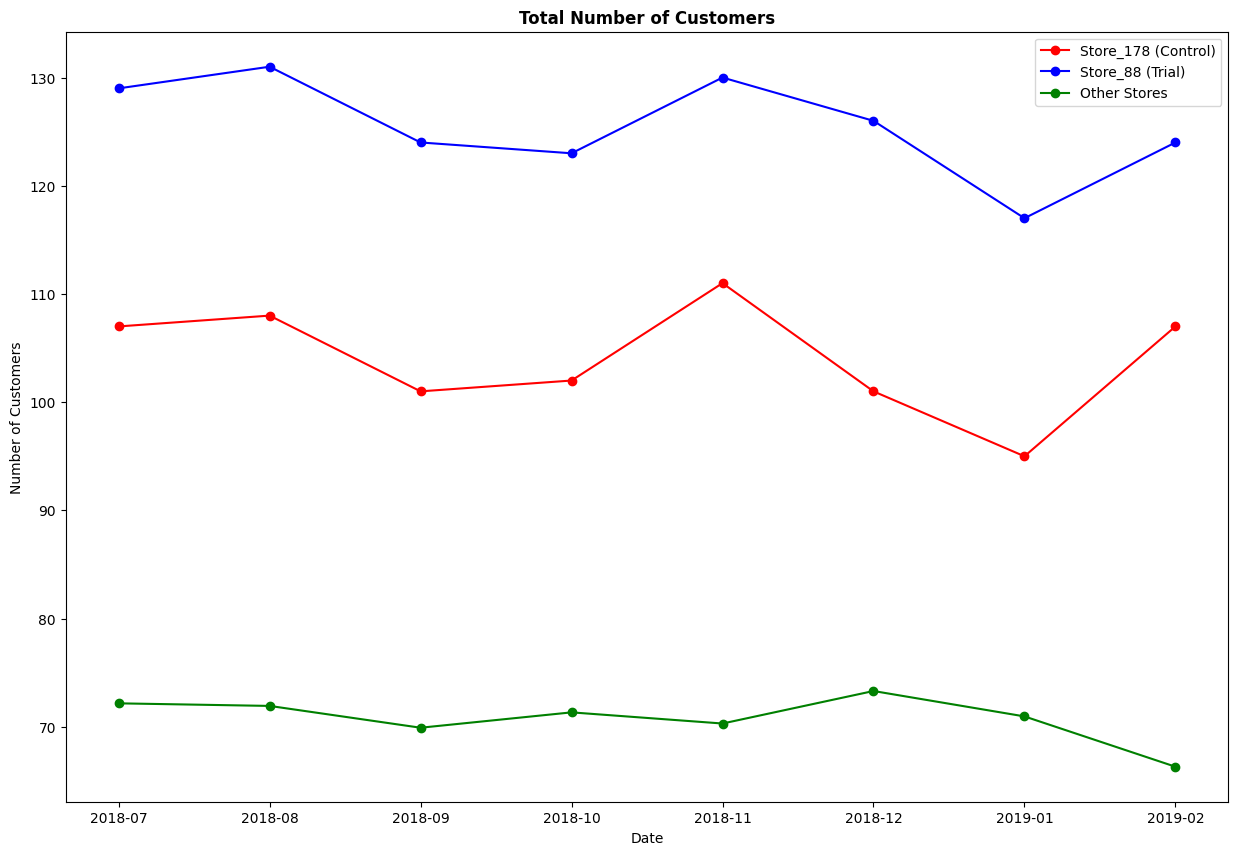

Visually from the two plots Store 178 is not a good control store even though it has the highest score. As such the next highest control scores will be visually tested to see if they are a good control for Store 88.

After plotting the next highest scores (stores 14, 237), Store 237 was found to be a good control store for Store 88.


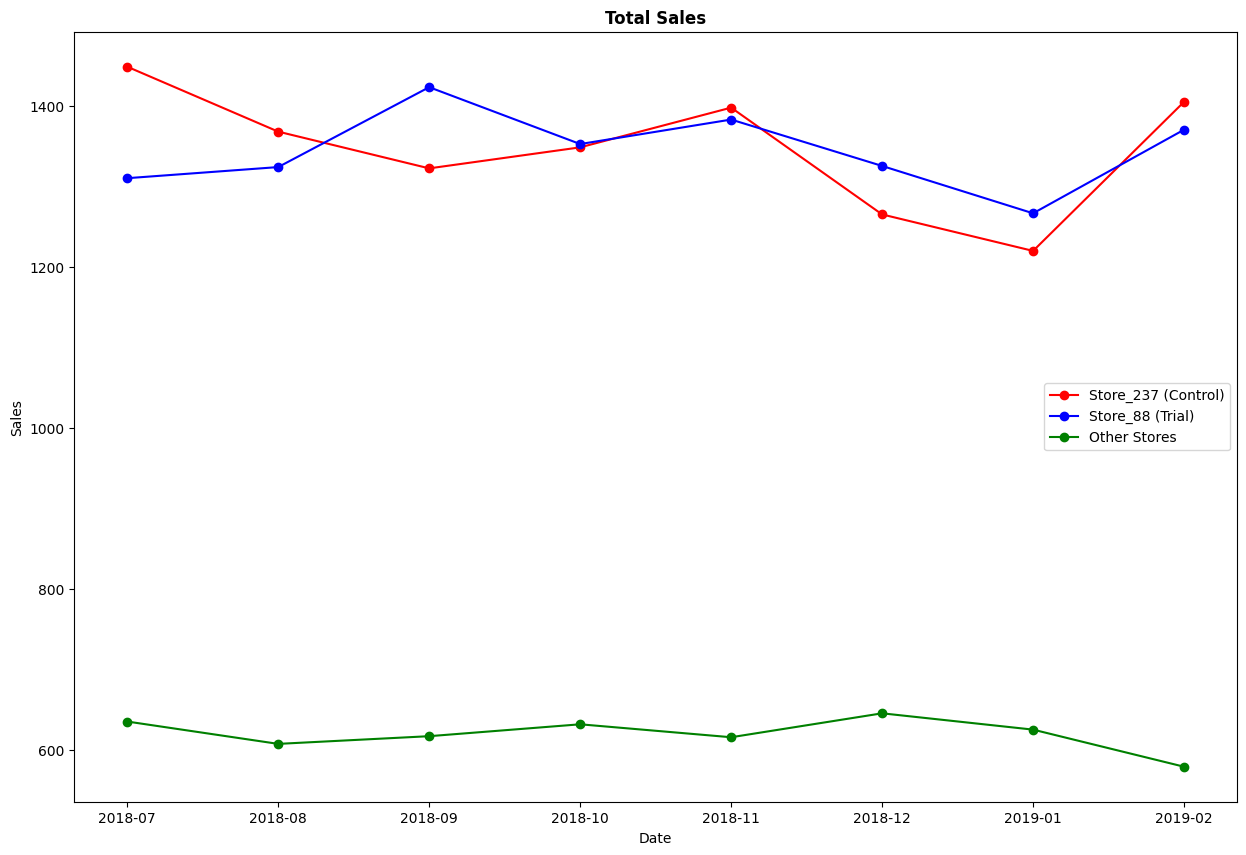

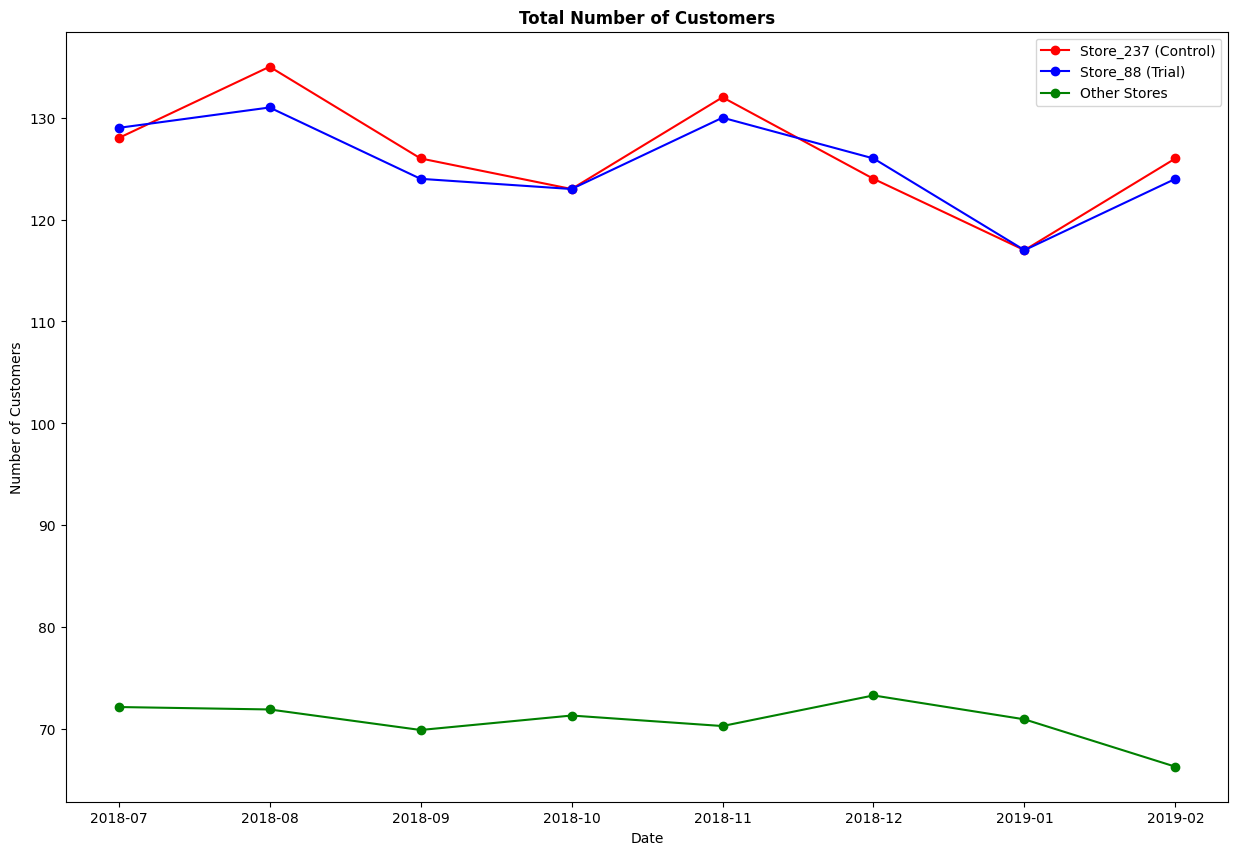

In [184]:
# plotting store 178 (control), store 88 (trial) and the other stores for SALES_REV & NUMBER_OF_CUST
oth_stores = brkdown_stores[~brkdown_stores['STORE_NBR'].isin([int(store_88_sre.iloc[0]['Control_Store']), 77, 86, 88])]

unq_dates = oth_stores['MONTH_YR'].unique().tolist()

hold_sales_rev = []

for date in unq_dates:
    df_dt = brkdown_stores.loc[brkdown_stores['MONTH_YR'] == date]

    hold_sales_rev.append(df_dt['SALES_REV'].mean())

hold_cust_cnt = []

for date in unq_dates:
    df_dt = brkdown_stores.loc[brkdown_stores['MONTH_YR'] == date]

    hold_cust_cnt.append(df_dt['NUMBER_OF_CUST'].mean())

plt.figure(figsize = (15, 10))
plt.title('Total Sales', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(brkdown_stores.loc[brkdown_stores['STORE_NBR'] == int(store_88_sre.iloc[0]['Control_Store'])]['MONTH_YR'], brkdown_stores.loc[brkdown_stores['STORE_NBR'] == int(store_88_sre.iloc[0]['Control_Store'])]['SALES_REV'], marker = 'o', color = 'red')
plt.plot(store_88['MONTH_YR'], store_88['SALES_REV'], marker = 'o', color = 'blue')
plt.plot(unq_dates, hold_sales_rev, marker = 'o', color = 'green')
plt.legend(['Store_178 (Control)', 'Store_88 (Trial)', 'Other Stores'])
plt.savefig('visualisations1/Total_Sales_88.png')
plt.show()

plt.figure(figsize = (15, 10))
plt.title('Total Number of Customers', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.plot(brkdown_stores.loc[brkdown_stores['STORE_NBR'] == int(store_88_sre.iloc[0]['Control_Store'])]['MONTH_YR'], brkdown_stores.loc[brkdown_stores['STORE_NBR'] == int(store_88_sre.iloc[0]['Control_Store'])]['NUMBER_OF_CUST'], marker = 'o', color = 'red')
plt.plot(store_88['MONTH_YR'], store_88['NUMBER_OF_CUST'], marker = 'o', color = 'blue')
plt.plot(unq_dates, hold_cust_cnt, marker = 'o', color = 'green')
plt.legend(['Store_178 (Control)', 'Store_88 (Trial)', 'Other Stores'])
plt.savefig('visualisations1/Total_Customers_88.png')
plt.show()

print('Visually from the two plots Store 178 is not a good control store even though it has the highest score. As such the next highest control scores will be visually tested to see if they are a good control for Store 88.')
print('')
print('After plotting the next highest scores (stores 14, 237), Store 237 was found to be a good control store for Store 88.')

# new control store, Store 237
oth_stores = brkdown_stores[~brkdown_stores['STORE_NBR'].isin([237, 77, 86, 88])]

unq_dates = oth_stores['MONTH_YR'].unique().tolist()

hold_sales_rev = []

for date in unq_dates:
    df_dt = brkdown_stores.loc[brkdown_stores['MONTH_YR'] == date]

    hold_sales_rev.append(df_dt['SALES_REV'].mean())

hold_cust_cnt = []

for date in unq_dates:
    df_dt = brkdown_stores.loc[brkdown_stores['MONTH_YR'] == date]

    hold_cust_cnt.append(df_dt['NUMBER_OF_CUST'].mean())

plt.figure(figsize = (15, 10))
plt.title('Total Sales', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(brkdown_stores.loc[brkdown_stores['STORE_NBR'] == 237]['MONTH_YR'], brkdown_stores.loc[brkdown_stores['STORE_NBR'] == 237]['SALES_REV'], marker = 'o', color = 'red')
plt.plot(store_88['MONTH_YR'], store_88['SALES_REV'], marker = 'o', color = 'blue')
plt.plot(unq_dates, hold_sales_rev, marker = 'o', color = 'green')
plt.legend(['Store_237 (Control)', 'Store_88 (Trial)', 'Other Stores'])
plt.savefig('visualisations1/Total_Sales_88.png')
plt.show()

plt.figure(figsize = (15, 10))
plt.title('Total Number of Customers', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.plot(brkdown_stores.loc[brkdown_stores['STORE_NBR'] == 237]['MONTH_YR'], brkdown_stores.loc[brkdown_stores['STORE_NBR'] == 237]['NUMBER_OF_CUST'], marker = 'o', color = 'red')
plt.plot(store_88['MONTH_YR'], store_88['NUMBER_OF_CUST'], marker = 'o', color = 'blue')
plt.plot(unq_dates, hold_cust_cnt, marker = 'o', color = 'green')
plt.legend(['Store_237 (Control)', 'Store_88 (Trial)', 'Other Stores'])
plt.savefig('visualisations1/Total_Customers_88.png')
plt.show()

In [185]:
# assessment of trial for SALES_REV
brkdown_stores_for_88 = brkdown_stores1

# trial period from Feb 2019 - Apr 2019
brkdown_stores_for_88_b4 = brkdown_stores_for_88.loc[brkdown_stores_for_88['MONTH_YR'] < '2019-02']

scale_num = (brkdown_stores_for_88_b4.loc[brkdown_stores_for_88_b4['STORE_NBR'] == 88])['SALES_REV'].sum() / (brkdown_stores_for_88_b4.loc[brkdown_stores_for_88_b4['STORE_NBR'] == 237])['SALES_REV'].sum()

brkdown_stores_for_88['SCALED_SALES_REV'] = brkdown_stores_for_88['SALES_REV'] * scale_num

display((brkdown_stores_for_88.loc[brkdown_stores_for_88['STORE_NBR'] == 237]).reset_index(drop = True))

,STORE_NBR,MONTH,MONTH_YR,SALES_REV,NUMBER_OF_CUST,AVERAGE_NUM_OF_TRANS_PER_CUST,AVERAGE_QTY_PER_CUST,AVERAGE_SALES_REV_PER_CUST,SCALED_SALES_REV,SCALED_NUMBER_OF_CUST
0,237,07,2018-07,1448.4,128,1.265625,2.531250,11.315625,1450.657086,128.0
1,237,08,2018-08,1367.8,135,1.229630,2.318519,10.131852,1369.931485,135.0
2,237,09,2018-09,1322.2,126,1.190476,2.373016,10.493651,1324.260425,126.0
3,237,10,2018-10,1348.3,123,1.219512,2.430894,10.961789,1350.401097,123.0
4,237,11,2018-11,1397.6,132,1.219697,2.424242,10.587879,1399.777923,132.0
5,237,12,2018-12,1265.0,124,1.169355,2.330645,10.201613,1266.971288,124.0
6,237,01,2019-01,1219.7,117,1.188034,2.367521,10.424786,1221.600696,117.0
7,237,02,2019-02,1404.8,126,1.246032,2.492063,11.149206,1406.989143,126.0
8,237,03,2019-03,1208.2,119,1.151261,2.302521,10.152941,1210.082775,119.0
9,237,04,2019-04,1204.6,120,1.133333,2.266667,10.038333,1206.477165,120.0


In [186]:
# percentage difference between trial's SALES_REV and control store's SCALED_SALES_REV
percent_diff_df = (brkdown_stores_for_88.loc[brkdown_stores_for_88['STORE_NBR'] == 88])[['MONTH_YR', 'SALES_REV']].merge((brkdown_stores_for_88.loc[brkdown_stores_for_88['STORE_NBR'] == 237])[['MONTH_YR', 'SCALED_SALES_REV']], on = 'MONTH_YR', how = 'left')

def get_percent_diff(trial_sales, control_sales):

    diff = (trial_sales - control_sales) / control_sales

    return diff

percent_diff_df['PERCENT_DIFF'] = percent_diff_df.apply(lambda i: get_percent_diff(i['SALES_REV'], i['SCALED_SALES_REV']), axis = 1)

percent_diff_df

,MONTH_YR,SALES_REV,SCALED_SALES_REV,PERCENT_DIFF
0,2018-07,1310.00,1450.657086,-0.096961
1,2018-08,1323.80,1369.931485,-0.033674
2,2018-09,1423.00,1324.260425,0.074562
3,2018-10,1352.40,1350.401097,0.001480
4,2018-11,1382.80,1399.777923,-0.012129
5,2018-12,1325.20,1266.971288,0.045959
6,2019-01,1266.40,1221.600696,0.036673
7,2019-02,1370.20,1406.989143,-0.026147
8,2019-03,1477.20,1210.082775,0.220743
9,2019-04,1439.40,1206.477165,0.193060


In [187]:
# t-test, H0: trial = control vs H1: trial != control 

# the test statistic: PERCENT_DIFF / standard deviation of PERCENT_DIFF
# degrees of freedom is 8 (months) - 1 = 7
# 95th percentile 
percent_diff_df['TEST_STAT'] = abs(percent_diff_df['PERCENT_DIFF'] / ((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()))

percent_diff_df['CRITICAL_VAL'] = scipy.stats.t.ppf(q = 0.95, df = 7)

display(percent_diff_df)

print('TEST_STAT for this MONTH_YRs are larger than the 95th percentile value of the t-distribution')

display((percent_diff_df[percent_diff_df['MONTH_YR'].isin(['2019-03', '2019-04', '2019-06'])])[['MONTH_YR', 'TEST_STAT', 'CRITICAL_VAL']].reset_index(drop = True))

,MONTH_YR,SALES_REV,SCALED_SALES_REV,PERCENT_DIFF,TEST_STAT,CRITICAL_VAL
0,2018-07,1310.00,1450.657086,-0.096961,1.693651,1.894579
1,2018-08,1323.80,1369.931485,-0.033674,0.588201,1.894579
2,2018-09,1423.00,1324.260425,0.074562,1.302402,1.894579
3,2018-10,1352.40,1350.401097,0.001480,0.025856,1.894579
4,2018-11,1382.80,1399.777923,-0.012129,0.211862,1.894579
5,2018-12,1325.20,1266.971288,0.045959,0.802782,1.894579
6,2019-01,1266.40,1221.600696,0.036673,0.640574,1.894579
7,2019-02,1370.20,1406.989143,-0.026147,0.456726,1.894579
8,2019-03,1477.20,1210.082775,0.220743,3.855795,1.894579
9,2019-04,1439.40,1206.477165,0.193060,3.372253,1.894579


TEST_STAT for this MONTH_YRs are larger than the 95th percentile value of the t-distribution


,MONTH_YR,TEST_STAT,CRITICAL_VAL
0,2019-03,3.855795,1.894579
1,2019-04,3.372253,1.894579
2,2019-06,3.011549,1.894579


In [188]:
# constructing the dfs for the plots 
SALES_REV_df = percent_diff_df[['MONTH_YR', 'SALES_REV']]
SALES_REV_df['TYPE'] = 'Trial Store 88'
SALES_REV_df = SALES_REV_df[['TYPE', 'MONTH_YR', 'SALES_REV']]
SALES_REV_df = pd.concat([SALES_REV_df, (brkdown_stores_for_88.loc[brkdown_stores_for_88['STORE_NBR'] == 237])[['MONTH_YR', 'SALES_REV']]])
SALES_REV_df.fillna('Control Store 237', inplace = True)
SALES_REV_df.reset_index(drop = True, inplace = True)

display(SALES_REV_df)

SALES_REV_95_df = (brkdown_stores_for_88.loc[brkdown_stores_for_88['STORE_NBR'] == 237])[['MONTH_YR', 'SALES_REV']]
SALES_REV_95_df['TYPE'] = 'Control Store 237 95th percentile'
SALES_REV_95_df['SALES_REV'] = SALES_REV_95_df['SALES_REV'] * (1 + (((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()) * 2))
SALES_REV_95_df = SALES_REV_95_df[['TYPE', 'MONTH_YR', 'SALES_REV']]

display(SALES_REV_95_df)

SALES_REV_5_df = (brkdown_stores_for_88.loc[brkdown_stores_for_88['STORE_NBR'] == 237])[['MONTH_YR', 'SALES_REV']]
SALES_REV_5_df['TYPE'] = 'Control Store 237 5th percentile'
SALES_REV_5_df['SALES_REV'] = SALES_REV_5_df['SALES_REV'] * (1 - (((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()) * 2))
SALES_REV_5_df = SALES_REV_5_df[['TYPE', 'MONTH_YR', 'SALES_REV']]

display(SALES_REV_5_df)

,TYPE,MONTH_YR,SALES_REV
0,Trial Store 88,2018-07,1310.00
1,Trial Store 88,2018-08,1323.80
2,Trial Store 88,2018-09,1423.00
3,Trial Store 88,2018-10,1352.40
4,Trial Store 88,2018-11,1382.80
5,Trial Store 88,2018-12,1325.20
6,Trial Store 88,2019-01,1266.40
7,Trial Store 88,2019-02,1370.20
8,Trial Store 88,2019-03,1477.20
9,Trial Store 88,2019-04,1439.40


,TYPE,MONTH_YR,SALES_REV
2753,Control Store 237 95th percentile,2018-07,1614.240799
2754,Control Store 237 95th percentile,2018-08,1524.412155
2755,Control Store 237 95th percentile,2018-09,1473.590986
2756,Control Store 237 95th percentile,2018-10,1502.679418
2757,Control Store 237 95th percentile,2018-11,1557.624234
2758,Control Store 237 95th percentile,2018-12,1409.841626
2747,Control Store 237 95th percentile,2019-01,1359.354807
2748,Control Store 237 95th percentile,2019-02,1565.648629
2749,Control Store 237 95th percentile,2019-03,1346.538065
2750,Control Store 237 95th percentile,2019-04,1342.525868


,TYPE,MONTH_YR,SALES_REV
2753,Control Store 237 5th percentile,2018-07,1282.559201
2754,Control Store 237 5th percentile,2018-08,1211.187845
2755,Control Store 237 5th percentile,2018-09,1170.809014
2756,Control Store 237 5th percentile,2018-10,1193.920582
2757,Control Store 237 5th percentile,2018-11,1237.575766
2758,Control Store 237 5th percentile,2018-12,1120.158374
2747,Control Store 237 5th percentile,2019-01,1080.045193
2748,Control Store 237 5th percentile,2019-02,1243.951371
2749,Control Store 237 5th percentile,2019-03,1069.861935
2750,Control Store 237 5th percentile,2019-04,1066.674132


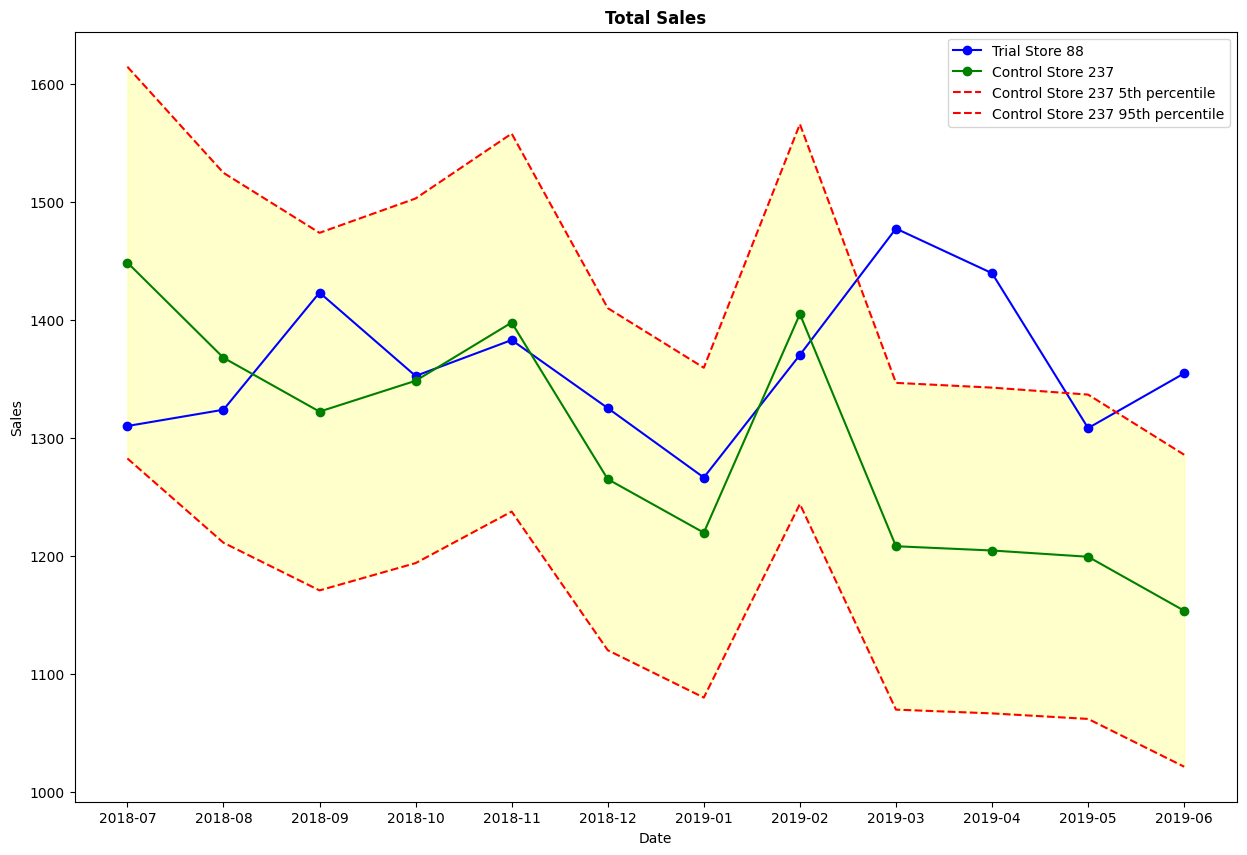

In [189]:
# plotting the graph
plt.figure(figsize = (15, 10))
plt.title('Total Sales', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot((SALES_REV_df.loc[SALES_REV_df['TYPE'] == 'Trial Store 88'])['MONTH_YR'], (SALES_REV_df.loc[SALES_REV_df['TYPE'] == 'Trial Store 88'])['SALES_REV'], marker = 'o', color = 'blue')
plt.plot((SALES_REV_df.loc[SALES_REV_df['TYPE'] == 'Control Store 237'])['MONTH_YR'], (SALES_REV_df.loc[SALES_REV_df['TYPE'] == 'Control Store 237'])['SALES_REV'], marker = 'o', color = 'green')
plt.plot(SALES_REV_5_df['MONTH_YR'], SALES_REV_5_df['SALES_REV'], linestyle = '--', color = 'red')
plt.plot(SALES_REV_95_df['MONTH_YR'], SALES_REV_95_df['SALES_REV'], linestyle = '--', color = 'red')
plt.legend(['Trial Store 88', 'Control Store 237', 'Control Store 237 5th percentile', 'Control Store 237 95th percentile'])
plt.fill_between(SALES_REV_95_df['MONTH_YR'], SALES_REV_95_df['SALES_REV'], SALES_REV_5_df['SALES_REV'], color = 'yellow', alpha = 0.2)
plt.savefig('visualisations1/Total_Sales_Conf_88.png')
plt.show()

In [190]:
# assessment of trial for NUMBER_OF_CUST
brkdown_stores_for_88 = brkdown_stores1

# trial period from Feb 2019 - Apr 2019
brkdown_stores_for_88_b4 = brkdown_stores_for_88.loc[brkdown_stores_for_88['MONTH_YR'] < '2019-02']

scale_num = (brkdown_stores_for_88_b4.loc[brkdown_stores_for_88_b4['STORE_NBR'] == 88])['NUMBER_OF_CUST'].sum() / (brkdown_stores_for_88_b4.loc[brkdown_stores_for_88_b4['STORE_NBR'] == 237])['NUMBER_OF_CUST'].sum()

brkdown_stores_for_88['SCALED_NUMBER_OF_CUST'] = brkdown_stores_for_88['NUMBER_OF_CUST'] * scale_num

display((brkdown_stores_for_88.loc[brkdown_stores_for_88['STORE_NBR'] == 237]).reset_index(drop = True))

,STORE_NBR,MONTH,MONTH_YR,SALES_REV,NUMBER_OF_CUST,AVERAGE_NUM_OF_TRANS_PER_CUST,AVERAGE_QTY_PER_CUST,AVERAGE_SALES_REV_PER_CUST,SCALED_SALES_REV,SCALED_NUMBER_OF_CUST
0,237,07,2018-07,1448.4,128,1.265625,2.531250,11.315625,1450.657086,127.276836
1,237,08,2018-08,1367.8,135,1.229630,2.318519,10.131852,1369.931485,134.237288
2,237,09,2018-09,1322.2,126,1.190476,2.373016,10.493651,1324.260425,125.288136
3,237,10,2018-10,1348.3,123,1.219512,2.430894,10.961789,1350.401097,122.305085
4,237,11,2018-11,1397.6,132,1.219697,2.424242,10.587879,1399.777923,131.254237
5,237,12,2018-12,1265.0,124,1.169355,2.330645,10.201613,1266.971288,123.299435
6,237,01,2019-01,1219.7,117,1.188034,2.367521,10.424786,1221.600696,116.338983
7,237,02,2019-02,1404.8,126,1.246032,2.492063,11.149206,1406.989143,125.288136
8,237,03,2019-03,1208.2,119,1.151261,2.302521,10.152941,1210.082775,118.327684
9,237,04,2019-04,1204.6,120,1.133333,2.266667,10.038333,1206.477165,119.322034


In [191]:
# percentage difference between trial's NUMBER_OF_CUST and control store's SCALED_NUMBER_OF_CUST
percent_diff_df = (brkdown_stores_for_88.loc[brkdown_stores_for_88['STORE_NBR'] == 88])[['MONTH_YR', 'NUMBER_OF_CUST']].merge((brkdown_stores_for_88.loc[brkdown_stores_for_88['STORE_NBR'] == 237])[['MONTH_YR', 'SCALED_NUMBER_OF_CUST']], on = 'MONTH_YR', how = 'left')

def get_percent_diff(trial_cust, control_cust):

    diff = (trial_cust - control_cust) / control_cust

    return diff

percent_diff_df['PERCENT_DIFF'] = percent_diff_df.apply(lambda i: get_percent_diff(i['NUMBER_OF_CUST'], i['SCALED_NUMBER_OF_CUST']), axis = 1)

percent_diff_df

,MONTH_YR,NUMBER_OF_CUST,SCALED_NUMBER_OF_CUST,PERCENT_DIFF
0,2018-07,129,127.276836,0.013539
1,2018-08,131,134.237288,-0.024116
2,2018-09,124,125.288136,-0.010281
3,2018-10,123,122.305085,0.005682
4,2018-11,130,131.254237,-0.009556
5,2018-12,126,123.299435,0.021902
6,2019-01,117,116.338983,0.005682
7,2019-02,124,125.288136,-0.010281
8,2019-03,134,118.327684,0.132448
9,2019-04,128,119.322034,0.072727


In [192]:
# t-test, H0: trial = control vs H1: trial != control 

# the test statistic: PERCENT_DIFF / standard deviation of PERCENT_DIFF
# degrees of freedom is 8 (months) - 1 = 7
# 95th percentile 
percent_diff_df['TEST_STAT'] = abs(percent_diff_df['PERCENT_DIFF'] / ((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()))

percent_diff_df['CRITICAL_VAL'] = scipy.stats.t.ppf(q = 0.95, df = 7)

display(percent_diff_df)

print('TEST_STAT for these MONTH_YRs is significantly larger than the 95th percentile value of the t-distribution')

display((percent_diff_df[percent_diff_df['MONTH_YR'].isin(['2019-03', '2019-04'])])[['MONTH_YR', 'TEST_STAT', 'CRITICAL_VAL']].reset_index(drop = True))

,MONTH_YR,NUMBER_OF_CUST,SCALED_NUMBER_OF_CUST,PERCENT_DIFF,TEST_STAT,CRITICAL_VAL
0,2018-07,129,127.276836,0.013539,0.854831,1.894579
1,2018-08,131,134.237288,-0.024116,1.522689,1.894579
2,2018-09,124,125.288136,-0.010281,0.649164,1.894579
3,2018-10,123,122.305085,0.005682,0.358749,1.894579
4,2018-11,130,131.254237,-0.009556,0.603350,1.894579
5,2018-12,126,123.299435,0.021902,1.382919,1.894579
6,2019-01,117,116.338983,0.005682,0.358749,1.894579
7,2019-02,124,125.288136,-0.010281,0.649164,1.894579
8,2019-03,134,118.327684,0.132448,8.362766,1.894579
9,2019-04,128,119.322034,0.072727,4.591985,1.894579


TEST_STAT for these MONTH_YRs is significantly larger than the 95th percentile value of the t-distribution


,MONTH_YR,TEST_STAT,CRITICAL_VAL
0,2019-03,8.362766,1.894579
1,2019-04,4.591985,1.894579


In [193]:
# constructing the dfs for the plots 
NUMBER_OF_CUST_df = percent_diff_df[['MONTH_YR', 'NUMBER_OF_CUST']]
NUMBER_OF_CUST_df['TYPE'] = 'Trial Store 88'
NUMBER_OF_CUST_df = NUMBER_OF_CUST_df[['TYPE', 'MONTH_YR', 'NUMBER_OF_CUST']]
NUMBER_OF_CUST_df = pd.concat([NUMBER_OF_CUST_df, (brkdown_stores_for_88.loc[brkdown_stores_for_88['STORE_NBR'] == 237])[['MONTH_YR', 'NUMBER_OF_CUST']]])
NUMBER_OF_CUST_df.fillna('Control Store 237', inplace = True)
NUMBER_OF_CUST_df.reset_index(drop = True, inplace = True)

display(NUMBER_OF_CUST_df)

NUMBER_OF_CUST_95_df = (brkdown_stores_for_88.loc[brkdown_stores_for_88['STORE_NBR'] == 237])[['MONTH_YR', 'NUMBER_OF_CUST']]
NUMBER_OF_CUST_95_df['TYPE'] = 'Control Store 237 95th percentile'
NUMBER_OF_CUST_95_df['NUMBER_OF_CUST'] = NUMBER_OF_CUST_95_df['NUMBER_OF_CUST'] * (1 + (((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()) * 2))
NUMBER_OF_CUST_95_df = NUMBER_OF_CUST_95_df[['TYPE', 'MONTH_YR', 'NUMBER_OF_CUST']]

display(NUMBER_OF_CUST_95_df)

NUMBER_OF_CUST_5_df = (brkdown_stores_for_88.loc[brkdown_stores_for_88['STORE_NBR'] == 237])[['MONTH_YR', 'NUMBER_OF_CUST']]
NUMBER_OF_CUST_5_df['TYPE'] = 'Control Store 237 5th percentile'
NUMBER_OF_CUST_5_df['NUMBER_OF_CUST'] = NUMBER_OF_CUST_5_df['NUMBER_OF_CUST'] * (1 - (((percent_diff_df.loc[percent_diff_df['MONTH_YR'] < '2019-02'])['PERCENT_DIFF'].std()) * 2))
NUMBER_OF_CUST_5_df = NUMBER_OF_CUST_5_df[['TYPE', 'MONTH_YR', 'NUMBER_OF_CUST']]

display(NUMBER_OF_CUST_5_df)

,TYPE,MONTH_YR,NUMBER_OF_CUST
0,Trial Store 88,2018-07,129
1,Trial Store 88,2018-08,131
2,Trial Store 88,2018-09,124
3,Trial Store 88,2018-10,123
4,Trial Store 88,2018-11,130
5,Trial Store 88,2018-12,126
6,Trial Store 88,2019-01,117
7,Trial Store 88,2019-02,124
8,Trial Store 88,2019-03,134
9,Trial Store 88,2019-04,128


,TYPE,MONTH_YR,NUMBER_OF_CUST
2753,Control Store 237 95th percentile,2018-07,132.054496
2754,Control Store 237 95th percentile,2018-08,139.276226
2755,Control Store 237 95th percentile,2018-09,129.991144
2756,Control Store 237 95th percentile,2018-10,126.896117
2757,Control Store 237 95th percentile,2018-11,136.181199
2758,Control Store 237 95th percentile,2018-12,127.927793
2747,Control Store 237 95th percentile,2019-01,120.706062
2748,Control Store 237 95th percentile,2019-02,129.991144
2749,Control Store 237 95th percentile,2019-03,122.769414
2750,Control Store 237 95th percentile,2019-04,123.801090


,TYPE,MONTH_YR,NUMBER_OF_CUST
2753,Control Store 237 5th percentile,2018-07,123.945504
2754,Control Store 237 5th percentile,2018-08,130.723774
2755,Control Store 237 5th percentile,2018-09,122.008856
2756,Control Store 237 5th percentile,2018-10,119.103883
2757,Control Store 237 5th percentile,2018-11,127.818801
2758,Control Store 237 5th percentile,2018-12,120.072207
2747,Control Store 237 5th percentile,2019-01,113.293938
2748,Control Store 237 5th percentile,2019-02,122.008856
2749,Control Store 237 5th percentile,2019-03,115.230586
2750,Control Store 237 5th percentile,2019-04,116.198910


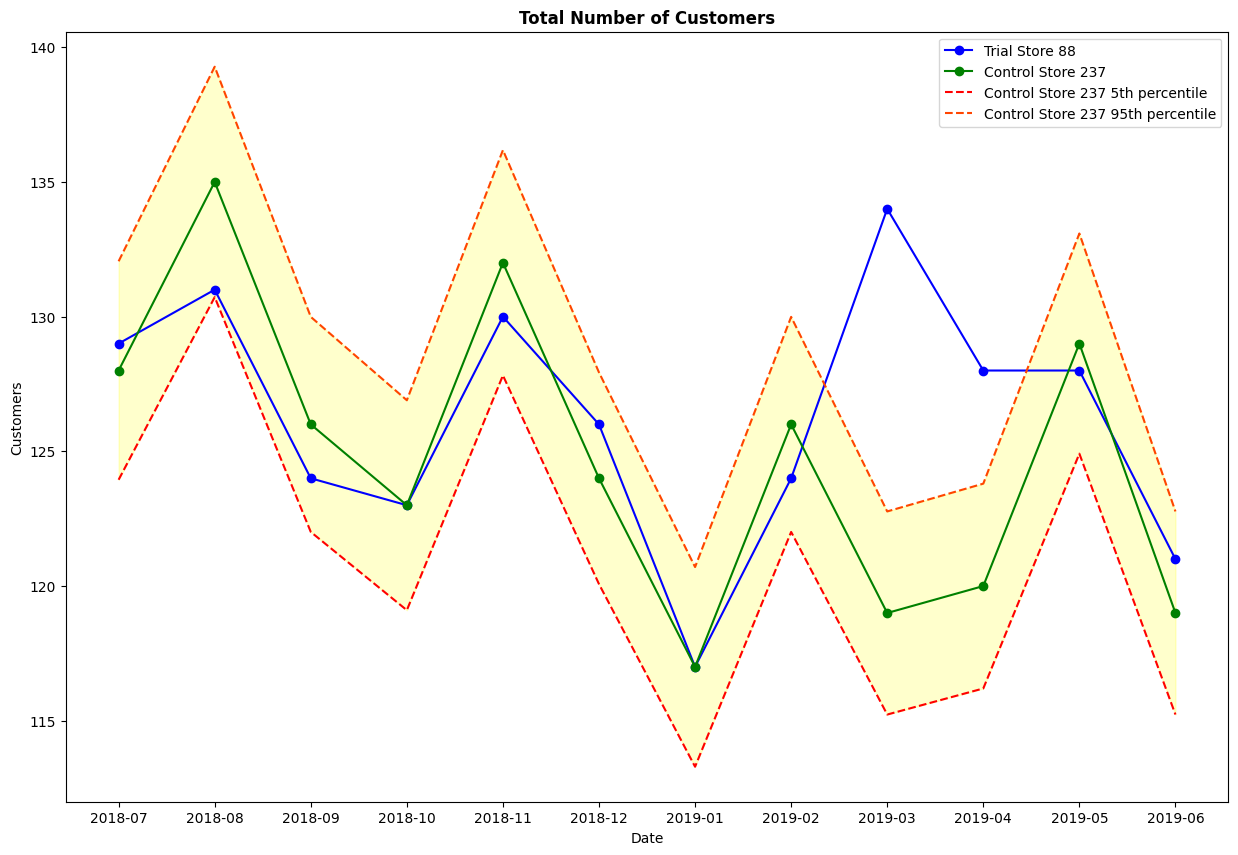

In [194]:
# plotting the graph
plt.figure(figsize = (15, 10))
plt.title('Total Number of Customers', fontweight = 'bold')
plt.xlabel('Date')
plt.ylabel('Customers')
plt.plot((NUMBER_OF_CUST_df.loc[NUMBER_OF_CUST_df['TYPE'] == 'Trial Store 88'])['MONTH_YR'], (NUMBER_OF_CUST_df.loc[NUMBER_OF_CUST_df['TYPE'] == 'Trial Store 88'])['NUMBER_OF_CUST'], marker = 'o', color = 'blue')
plt.plot((NUMBER_OF_CUST_df.loc[NUMBER_OF_CUST_df['TYPE'] == 'Control Store 237'])['MONTH_YR'], (NUMBER_OF_CUST_df.loc[NUMBER_OF_CUST_df['TYPE'] == 'Control Store 237'])['NUMBER_OF_CUST'], marker = 'o', color = 'green')
plt.plot(NUMBER_OF_CUST_5_df['MONTH_YR'], NUMBER_OF_CUST_5_df['NUMBER_OF_CUST'], linestyle = '--', color = 'red')
plt.plot(NUMBER_OF_CUST_95_df['MONTH_YR'], NUMBER_OF_CUST_95_df['NUMBER_OF_CUST'], linestyle = '--', color = 'orangered')
plt.legend(['Trial Store 88', 'Control Store 237', 'Control Store 237 5th percentile', 'Control Store 237 95th percentile'])
plt.fill_between(NUMBER_OF_CUST_95_df['MONTH_YR'], NUMBER_OF_CUST_95_df['NUMBER_OF_CUST'], NUMBER_OF_CUST_5_df['NUMBER_OF_CUST'], color = 'yellow', alpha = 0.2)
plt.savefig('visualisations1/Total_Customers_Conf_88.png')
plt.show()

- Store 88's control store was found to be Store 237 even though it did not have the highest control score

There was a significant increase in total sales and total customers for Store 88 during March 2019 and April 2019 for the trial period which goes from February 2019 to April 2019. Both total sales and total customers exceeded the 95% threshold/interval of the control store, Store 237. The trial in Store 88 is significantly different (performed better) to Store 237 as a result. The store even exceeded the 95% threshold/interval in June 2019 which could be reflective of the trial's success and positive impact on Store 88.

- Thus, the trial performed in Store 88 proved to be successful

### Conclusion

- Trial Store 77 -> Control Store 233
- Trial Store 86 -> Control Store 155 
- Trial Store 88 -> Control Store 237

There was a significant increase in total sales and total customers for Store 77 and Store 88 during March 2019 and April 2019 for the trial period which goes from February 2019 to April 2019. Both total sales and total customers exceeded the 95% threshold/interval of their respective control stores. However, Store 86 needs a further investigation given that it only had a significant increase in total sales for March 2019 but had a significant increase for all trial months in total customers.

Overall the trials performed were successful and were positively significant due to increased total sales and total customers.